# 1.1: Analyze historical sales data to identify patterns and trends

## Stratified Sampling

In [71]:
import csv
import math
import random
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")


In [72]:
purchases = pd.read_csv('data/AmazonPurchases.csv')
survey = pd.read_csv('data/survey.csv')

In [73]:
purchases = purchases.drop(purchases.columns[0], axis=1)

In [74]:
purchases.info()
purchases.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850717 entries, 0 to 1850716
Data columns (total 8 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Order Date                object 
 1   Purchase Price Per Unit   float64
 2   Quantity                  int64  
 3   Shipping Address State    object 
 4   Title                     object 
 5   ASIN/ISBN (Product Code)  object 
 6   Survey ResponseID         object 
 7   Category                  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 113.0+ MB


Order Date                      0
Purchase Price Per Unit         0
Quantity                        0
Survey ResponseID               0
ASIN/ISBN (Product Code)      973
Shipping Address State      87812
Category                    89658
Title                       89740
dtype: int64

In [75]:
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases['year'] = purchases['Order Date'].dt.year
purchases['month'] = purchases['Order Date'].dt.month
purchases['day'] = purchases['Order Date'].dt.day
purchases = purchases[purchases['Order Date'] < '2022-11-01']

In [76]:
survey.head()

,Survey ResponseID,Q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,R_1ou69fj4DQGsVcp,35 - 44 years,No,Black or African American,High school diploma or GED,"$25,000 - $49,999",Female,heterosexual (straight),Iowa,2,...,No,Yes,No,No,Lost a job,No,No,No,No,No
1,R_2UbJL30HRjK1sdD,45 - 54 years,No,White or Caucasian,High school diploma or GED,"$100,000 - $149,999",Male,heterosexual (straight),Ohio,2,...,No,No,No,No,NaN,No,No,No,No,Yes
2,R_UPXamGKtmf4RVIZ,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),Arkansas,1 (just me!),...,No,No,Yes,No,NaN,No,No,No,No,Yes
3,R_2dYk5auG9Fv5Qve,35 - 44 years,Yes,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...","$50,000 - $74,999",Male,heterosexual (straight),Tennessee,1 (just me!),...,No,No,No,No,NaN,No,No,No,No,No
4,R_2aP0GyIR66gSTiR,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$50,000 - $74,999",Male,heterosexual (straight),Virginia,2,...,No,Yes,No,No,NaN,No,Yes if consumers get part of the profit,I don't know,No,No


In [77]:
survey.info()
survey.isnull().sum().sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5027 entries, 0 to 5026
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Survey ResponseID           5027 non-null   object
 1   Q-demos-age                 5027 non-null   object
 2   Q-demos-hispanic            5027 non-null   object
 3   Q-demos-race                5027 non-null   object
 4   Q-demos-education           5027 non-null   object
 5   Q-demos-income              5027 non-null   object
 6   Q-demos-gender              5027 non-null   object
 7   Q-sexual-orientation        5027 non-null   object
 8   Q-demos-state               5027 non-null   object
 9   Q-amazon-use-howmany        5027 non-null   object
 10  Q-amazon-use-hh-size        5027 non-null   object
 11  Q-amazon-use-how-oft        5027 non-null   object
 12  Q-substance-use-cigarettes  5027 non-null   object
 13  Q-substance-use-marijuana   5027 non-null   obje

Survey ResponseID                0
Q-small-biz-use                  0
Q-sell-consumer-data             0
Q-sell-YOUR-data                 0
Q-personal-wheelchair            0
Q-personal-diabetes              0
Q-substance-use-alcohol          0
Q-substance-use-marijuana        0
Q-substance-use-cigarettes       0
Q-census-use                     0
Q-amazon-use-how-oft             0
Q-amazon-use-howmany             0
Q-demos-state                    0
Q-sexual-orientation             0
Q-demos-gender                   0
Q-demos-income                   0
Q-demos-education                0
Q-demos-race                     0
Q-demos-hispanic                 0
Q-demos-age                      0
Q-amazon-use-hh-size             0
Q-research-society               0
Q-life-changes                3384
dtype: int64

In [78]:
survey = survey['Survey ResponseID'].to_frame()
survey.shape[0]

5027

In [79]:
random.seed(23)
stratified_sample = survey.apply(lambda x: x.sample(frac=0.20))
stratified_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1005 entries, 909 to 2634
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Survey ResponseID  1005 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [80]:
random.seed(21)
from datetime import datetime, timedelta

# Define the start and end dates
start_date = datetime(2018, 1, 1)
end_date = datetime(2022, 11, 1)

def generate_random_date(start, end):
    delta = end - start
    random_days = random.randint(0, delta.days)
    return start + timedelta(days=random_days)

stratified_sample['last_purchase_date'] = stratified_sample.apply(lambda x: generate_random_date(start_date, end_date), axis=1)

In [81]:
stratified_sample.head()

,Survey ResponseID,last_purchase_date
909,R_ZfxDd4JY8M1gR8J,2018-12-04
1578,R_2diGjJelIirkHCV,2020-05-06
234,R_1MXNkKRoumaX8uK,2021-11-13
1841,R_2OTIQ8boNbA8jt5,2020-05-06
2538,R_7ZH1uBNuL9RQ2K5,2021-07-24


In [82]:
merged_df = pd.merge(purchases, stratified_sample, on='Survey ResponseID', how='left')
merged_df.info()
merged_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1737058 entries, 0 to 1737057
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   Order Date                datetime64[ns]
 1   Purchase Price Per Unit   float64       
 2   Quantity                  int64         
 3   Shipping Address State    object        
 4   Title                     object        
 5   ASIN/ISBN (Product Code)  object        
 6   Survey ResponseID         object        
 7   Category                  object        
 8   year                      int32         
 9   month                     int32         
 10  day                       int32         
 11  last_purchase_date        datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int32(3), int64(1), object(5)
memory usage: 139.2+ MB


Order Date                        0
Purchase Price Per Unit           0
Quantity                          0
Shipping Address State        82469
Title                         88974
ASIN/ISBN (Product Code)        943
Survey ResponseID                 0
Category                      88900
year                              0
month                             0
day                               0
last_purchase_date          1402109
dtype: int64

In [83]:
merged_df['last_purchase_date'] = merged_df['last_purchase_date'].fillna(datetime(2022, 12, 31))
merged_df.isnull().sum()

Order Date                      0
Purchase Price Per Unit         0
Quantity                        0
Shipping Address State      82469
Title                       88974
ASIN/ISBN (Product Code)      943
Survey ResponseID               0
Category                    88900
year                            0
month                           0
day                             0
last_purchase_date              0
dtype: int64

In [84]:
final_df = merged_df[merged_df['Order Date'] <= merged_df['last_purchase_date']]
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1547672 entries, 0 to 1737057
Data columns (total 12 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Order Date                1547672 non-null  datetime64[ns]
 1   Purchase Price Per Unit   1547672 non-null  float64       
 2   Quantity                  1547672 non-null  int64         
 3   Shipping Address State    1473016 non-null  object        
 4   Title                     1465652 non-null  object        
 5   ASIN/ISBN (Product Code)  1546881 non-null  object        
 6   Survey ResponseID         1547672 non-null  object        
 7   Category                  1465740 non-null  object        
 8   year                      1547672 non-null  int32         
 9   month                     1547672 non-null  int32         
 10  day                       1547672 non-null  int32         
 11  last_purchase_date        1547672 non-null  datetime64[

In [85]:
final_df['Survey ResponseID'].nunique()

4915

In [38]:
final_df = final_df.iloc[:, :8]

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

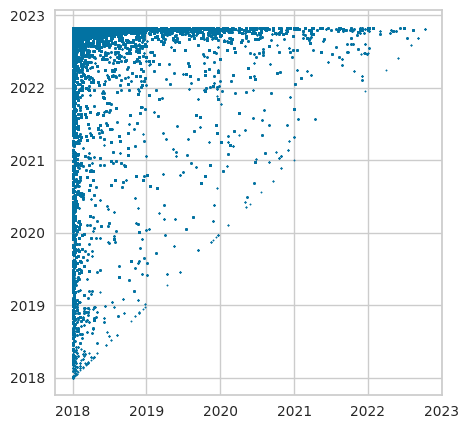

In [39]:
df_edit = final_df.copy()
df_edit['min_date'] = df_edit.groupby(['Survey ResponseID'])['Order Date'].transform("min")
df_edit['max_date'] = df_edit.groupby(['Survey ResponseID'])['Order Date'].transform("max")
plt.figure(figsize=(5,5))
plt.scatter(df_edit['min_date'],df_edit['max_date'], s = 1)

In [19]:
'''
import csv

from google.colab import drive
drive.mount('/content/drive')

csv.filename = 'final_df.csv'
final_df.to_csv('/content/drive/MyDrive/' + csv.filename, index=False)
'''

"\nimport csv\n\nfrom google.colab import drive\ndrive.mount('/content/drive')\n\ncsv.filename = 'final_df.csv'\nfinal_df.to_csv('/content/drive/MyDrive/' + csv.filename, index=False)\n"

## Data Preparation

### Libraries and data files

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px
import time
import random
from scipy.stats import beta

### Simulation

In [ ]:
purchases = pd.read_csv('data/dataprep_purchases.csv')
purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care


In [ ]:
customers = {
    'Survey ResponseID': purchases['Survey ResponseID'].unique()
}
customers = pd.DataFrame(customers)

### Adding Prime Column

In [ ]:
# add prime column
purchases['Prime'] = 0

from collections import Counter

# amazon prime days from 2018-2022 and amazon prime early access sale 2022
date_ranges = {
    'July 16-17, 2018': ('2018-07-16', '2018-07-17'),
    'July 15-16, 2019': ('2019-07-15', '2019-07-16'),
    'October 13-14, 2020': ('2020-10-13', '2020-10-14'),
    'June 21-22, 2021': ('2021-06-21', '2021-06-22'),
    'July 12-13, 2022': ('2022-07-12', '2022-07-13'),
    'October 11-12, 2022': ('2022-10-11', '2022-10-12')
}

# getting all response ids in the date ranges
id_sets = []
for range_name, (start_date, end_date) in date_ranges.items():
    mask = (purchases['Order Date'] >= start_date) & (purchases['Order Date'] <= end_date)
    distinct_ids = set(purchases[mask]['Survey ResponseID'].unique())
    id_sets.append(distinct_ids)

# response ids that appear in at least 2 events
all_ids = [id for id_set in id_sets for id in id_set]
id_counts = Counter(all_ids)
common_ids = {id for id, count in id_counts.items() if count >= 2}

# make response ids in common_ids as Prime members (Prime = 1)
purchases.loc[purchases['Survey ResponseID'].isin(common_ids), 'Prime'] = 1

print(purchases[purchases['Survey ResponseID'].isin(common_ids)][['Survey ResponseID', 'Prime']].drop_duplicates())

         Survey ResponseID  Prime
607      R_06RZP9pS7kONINr      1
1684     R_0Arj0ePpTnReV1v      1
1800     R_0BCm9hRP9iTI081      1
3000     R_0BWkZUjRId7FDZn      1
3236     R_0D6GtQwa6VcnXpv      1
...                    ...    ...
1527720  R_zTf2i6s3E2OQZQR      1
1528309  R_zYlhkltqLl0WShX      1
1529407  R_zd4E1BgAdaM2761      1
1529925  R_zdLOP8JD2pe1brj      1
1530207  R_zfnsck2ZatnGtY5      1

[1963 rows x 2 columns]


In [ ]:
# total number of unique response ids
total_unique_ids = purchases['Survey ResponseID'].nunique()

# number of unique response ids where Prime = 1
prime_unique_ids = purchases[purchases['Prime'] == 1]['Survey ResponseID'].nunique()

# percentages of unique response ids that are Prime = 1
prime_percentage = (prime_unique_ids / total_unique_ids) * 100
print(f"Percentage of total unique IDs that are prime: {prime_percentage:.2f}%")

Percentage of total unique IDs that are prime: 39.87%


In [ ]:
# total distinct response ids
total_distinct_responses = purchases['Survey ResponseID'].nunique()
print("Total number of distinct Survey Response IDs:", total_distinct_responses)

Total number of distinct Survey Response IDs: 4923


In [ ]:
# 65% of total survey response ids
TOTALCOUNT = int(0.65 * total_distinct_responses)
print("65% of total Survey Response IDs (TOTALCOUNT):", TOTALCOUNT)

65% of total Survey Response IDs (TOTALCOUNT): 3199


In [ ]:
# 39.87% is 1962 people
# We will need:
print(3199-1962)

1237


In [ ]:
# number of additional response ids to set as Prime
additional_needed = 1237

# get response ids that are non-Prime
non_prime_ids = purchases[purchases['Prime'] == 0]['Survey ResponseID'].unique().tolist()

# randomly set 1154 more response ids as prime
additional_prime_ids = set(random.sample(non_prime_ids, additional_needed))
purchases.loc[purchases['Survey ResponseID'].isin(additional_prime_ids), 'Prime'] = 1
print(f"Number of additional IDs set to Prime: {additional_needed}")

Number of additional IDs set to Prime: 1237


In [ ]:
# number of unique response ids where Prime = 1
prime_unique_ids = purchases[purchases['Prime'] == 1]['Survey ResponseID'].nunique()

# percentages of unique response ids that are Prime = 1 now
prime_percentage = (prime_unique_ids / total_unique_ids) * 100
print(f"Percentage of total unique IDs that are prime: {prime_percentage:.2f}%")

Percentage of total unique IDs that are prime: 65.00%


In [ ]:
purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,0
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,0
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,0
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,0
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,0


In [ ]:
prime_users = purchases[purchases['Prime'] == 1]
prime_users = prime_users['Survey ResponseID'].drop_duplicates()

prime_users = pd.DataFrame(prime_users)
prime_users['Prime'] = 1
prime_users.head()

customers = pd.merge(customers, prime_users, on='Survey ResponseID', how='left')
customers['Prime'] = customers['Prime'].fillna(0).astype(int)
customers.head()

,Survey ResponseID,Prime
0,R_01vNIayewjIIKMF,0
1,R_037XK72IZBJyF69,1
2,R_03aEbghUILs9NxD,0
3,R_06RZP9pS7kONINr,1
4,R_06d9ULxrBmkwSTn,0


###Free trial for prime

In [ ]:
customers['Free Trial'] = customers['Prime'].apply(lambda x: 1 if x == 1 else (1 if np.random.uniform(0, 1) > 0.3 else 0))

print(customers['Free Trial'].describe())

count    4923.000000
mean        0.891123
std         0.311516
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Free Trial, dtype: float64


### Discounts Column

In [ ]:
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])

sales_dates = [
    ('2021-06-21', '2021-06-22'),  # Amazon Prime Day 2021
    ('2022-07-12', '2022-07-13'),  # Amazon Prime Day 2022
    ('2018-07-15', '2018-07-17'),  # Amazon Prime Day 2018
    ('2019-07-15', '2019-07-17'),  # Amazon Prime Day 2019
    ('2022-10-11', '2022-10-12'),  # Amazon Prime Early Access Sale 2022
    ('2020-10-13', '2020-10-14'),  # Amazon Prime Day 2020
    ('2018-11-24', '2018-12-02'),  # Black Friday & Cyber Monday
    ('2019-11-24', '2019-12-02'),
    ('2020-11-24', '2020-12-02'),
    ('2021-11-24', '2021-12-02'),
    ('2022-11-24', '2022-12-02')
]

sales_periods = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in sales_dates]

# Discount for event days
discounts = [0, 0.3, 0.35, 0.4, 0.45, 0.5]
probabilities = [0.2, 0.2, 0.2, 0.2, 0.15, 0.05]

def assign_discount(order_date):
    for start, end in sales_periods:
        if start <= order_date <= end:
            return np.random.choice(discounts, p=probabilities)
    return np.nan  # NaN the non-sales dates

purchases['Discounts'] = purchases['Order Date'].apply(assign_discount)

purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,0,NaN
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,0,NaN
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,0,NaN
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,0,NaN
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,0,NaN


In [ ]:
# Discount for normal days
normal_discounts = [0, 0.05, 0.1, 0.15, 0.2]
normal_probabilities = [0.6, 0.16, 0.12, 0.08, 0.04]

def assign_normal_discount(discount_value):
    if pd.isna(discount_value):
        return np.random.choice(normal_discounts, p=normal_probabilities)
    return discount_value

purchases['Discounts'] = purchases['Discounts'].apply(assign_normal_discount)

purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,0,0.00
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,0,0.10
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,0,0.15
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,0,0.10
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,0,0.00


#### surveyids that bought in event periods


In [ ]:
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'])

sales_dates = [
    ('2021-06-21', '2021-06-22'),  # Amazon Prime Day 2021
    ('2022-07-12', '2022-07-13'),  # Amazon Prime Day 2022
    ('2018-07-15', '2018-07-17'),  # Amazon Prime Day 2018
    ('2019-07-15', '2019-07-17'),  # Amazon Prime Day 2019
    ('2022-10-11', '2022-10-12'),  # Amazon Prime Early Access Sale 2022
    ('2020-10-13', '2020-10-14'),  # Amazon Prime Day 2020
    ('2018-11-24', '2018-12-02'),  # Black Friday & Cyber Monday
    ('2019-11-24', '2019-12-02'),
    ('2020-11-24', '2020-12-02'),
    ('2021-11-24', '2021-12-02'),
    ('2022-11-24', '2022-12-02')
]

sales_dates = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in sales_dates]

# purchases in date ranges
event_goers = purchases[
    purchases['Order Date'].apply(lambda date: any(start <= date <= end for start, end in sales_dates))
]

# keep only survey responseid column
event_goers = event_goers[['Survey ResponseID']].drop_duplicates()

event_goers

,Survey ResponseID
101,R_037XK72IZBJyF69
585,R_03aEbghUILs9NxD
621,R_06RZP9pS7kONINr
1032,R_06d9ULxrBmkwSTn
1142,R_07oHvj3bLVVRCRb
...,...
1528949,R_zbZLoKX4IzA4oql
1529389,R_zczhhGpVCmLwad3
1529453,R_zd4E1BgAdaM2761
1529948,R_zdLOP8JD2pe1brj


### CTC

count    4923.000000
mean        0.022762
std         0.019416
min         0.000027
25%         0.008033
50%         0.017500
75%         0.032399
max         0.173778
Name: Average CTC, dtype: float64


<Axes: xlabel='Average CTC', ylabel='Count'>

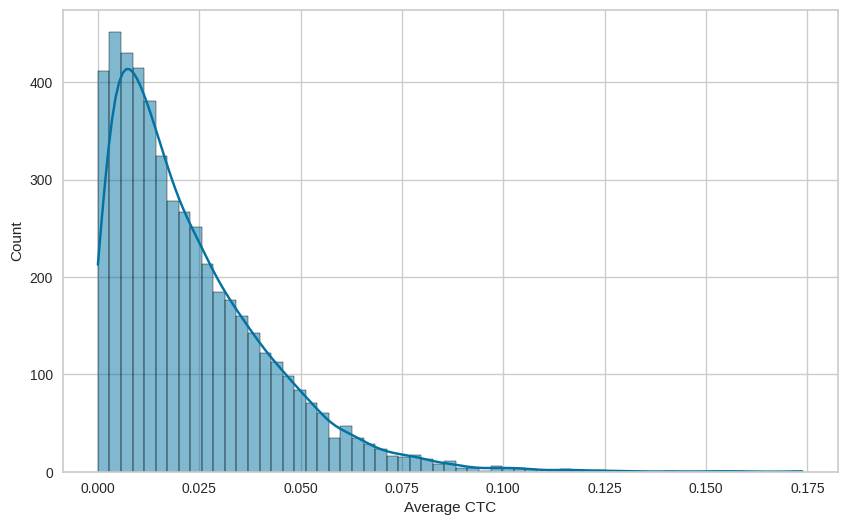

In [ ]:
#Simulating click to conversion rates for all marketing channels
random.seed(3101)
#Email
desired_mean = 0.047
size = len(customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
customers['Email CTC'] = data
#Display ad
desired_mean = 0.02
size = len(customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
customers['Display Ad CTC'] = data
#Video ad
desired_mean = 0.01
size = len(customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
customers['Video Ad CTC'] = data
#Search Engine Ad
desired_mean = 0.025
size = len(customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
customers['Search Engine Ad CTC'] = data
#Social media ad
desired_mean = 0.015
size = len(customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
customers['Social Media Ad CTC'] = data
#Average
customers['Average CTC'] = (customers['Email CTC'] + customers['Display Ad CTC'] + customers['Video Ad CTC'] + customers['Search Engine Ad CTC'] + customers['Social Media Ad CTC'])/5
print(customers['Average CTC'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(customers['Average CTC'], kde=True)

In [ ]:
# Setting some of the CTC rates to 0

customers['Email CTC'] = customers['Email CTC'].where(customers['Email CTC'] >= 0.02, 0)                                      #2%
customers['Display Ad CTC'] = customers['Display Ad CTC'].where(customers['Display Ad CTC'] >= 0.01, 0)                       #1%
customers['Video Ad CTC'] = customers['Video Ad CTC'].where(customers['Video Ad CTC'] >= 0.005, 0)                            #0.05%
customers['Search Engine Ad CTC'] = customers['Search Engine Ad CTC'].where(customers['Search Engine Ad CTC'] >= 0.02, 0)     #2%
customers['Social Media Ad CTC'] = customers['Social Media Ad CTC'].where(customers['Social Media Ad CTC'] >= 0.01, 0)        #1%
customers['Average CTC'] = customers['Average CTC'].where(customers['Average CTC'] >= 0.02, 0)                                #2%

### Paid for express shipping

In [ ]:
## All Prime members will have Express Shipping == 1
np.random.seed(42)

p_temp = purchases[purchases['Prime'] == 0]
p_temp = p_temp[['Survey ResponseID', 'Order Date']].drop_duplicates()
p_temp_count = len(p_temp)
temp = np.random.binomial(1, 0.47, size = p_temp_count)
p_temp['Express Shipping'] = temp

purchases = pd.merge(purchases, p_temp, on=['Survey ResponseID', 'Order Date'], how='left')
purchases['Express Shipping'] = purchases['Express Shipping'].fillna(1).astype(int)
purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,0,0.00,0
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,0,0.10,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,0,0.15,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,0,0.10,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,0,0.00,1


In [ ]:
express_cust = (
    purchases[purchases['Express Shipping'] == 1]
    .drop_duplicates(subset=['Survey ResponseID', 'Order Date'])
    .groupby('Survey ResponseID')
    .size()
    .reset_index(name='num_express')
)
express_cust.head()

,Survey ResponseID,num_express
0,R_01vNIayewjIIKMF,3
1,R_037XK72IZBJyF69,160
2,R_03aEbghUILs9NxD,5
3,R_06RZP9pS7kONINr,132
4,R_06d9ULxrBmkwSTn,27


In [ ]:
all_cust = (
    purchases.drop_duplicates(subset=['Survey ResponseID', 'Order Date'])
    .groupby('Survey ResponseID')
    .size()
    .reset_index(name='num_express_all')
)
all_cust.head()

,Survey ResponseID,num_express_all
0,R_01vNIayewjIIKMF,5
1,R_037XK72IZBJyF69,160
2,R_03aEbghUILs9NxD,14
3,R_06RZP9pS7kONINr,132
4,R_06d9ULxrBmkwSTn,62


In [ ]:
exp_ship = pd.merge(all_cust, express_cust, on='Survey ResponseID', how='left')
exp_ship['Express Shipping'] = exp_ship['num_express'] / exp_ship['num_express_all']
exp_ship.head()

customers = pd.merge(customers, exp_ship[['Survey ResponseID', 'Express Shipping']], on='Survey ResponseID', how='left')
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping
0,R_01vNIayewjIIKMF,0,0,0.047332,0.000000,0.000000,0.000000,0.0,0.000000,0.600000
1,R_037XK72IZBJyF69,1,1,0.050025,0.000000,0.000000,0.028397,0.0,0.000000,1.000000
2,R_03aEbghUILs9NxD,0,0,0.000000,0.152505,0.000000,0.084507,0.0,0.049471,0.357143
3,R_06RZP9pS7kONINr,1,1,0.022101,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
4,R_06d9ULxrBmkwSTn,0,1,0.000000,0.000000,0.012684,0.180513,0.0,0.038689,0.435484


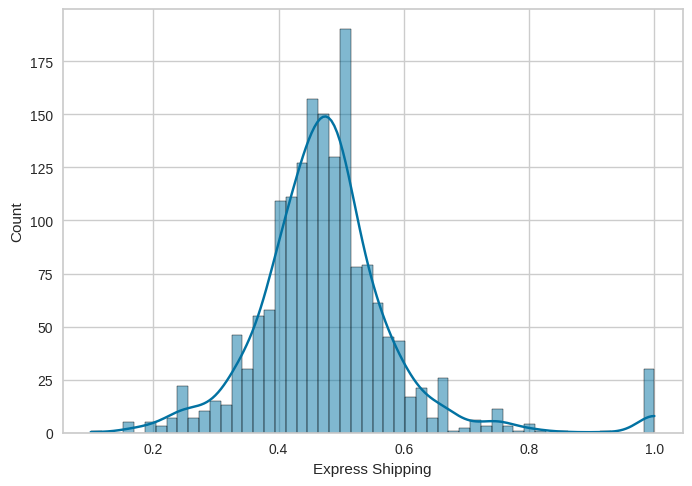

In [ ]:
sns.histplot(customers[customers['Prime'] == 0]['Express Shipping'], kde = True)
plt.show()

### Pre- tagging of customers

In [ ]:
num_to_sample_25 = int(len(customers) * 0.25)
print(num_to_sample_25)
num_to_sample_45 = int(len(customers) * 0.45)
print(num_to_sample_45)

1230
2215


In [ ]:
# Getting the impulse customers (45%)
impulse = event_goers.sample(n = num_to_sample_45, random_state=11)
impulse = customers[customers['Survey ResponseID'].isin(impulse['Survey ResponseID'])]
impulse_id = impulse['Survey ResponseID'].tolist()

# Getting the indecisive customers (25%)
non_impulse = customers[~customers['Survey ResponseID'].isin(impulse_id)].sample(n=num_to_sample_25, random_state=11)
non_impulse_id = non_impulse['Survey ResponseID'].tolist()

# Getting the remaining normal customers
remaining_customers = customers[~customers['Survey ResponseID'].isin(impulse_id + non_impulse_id)]

#### Cart abandonment rate

In [ ]:
# for indecisive buyers
np.random.seed(42)
desired_mean = 0.85
size = len(non_impulse.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
non_impulse['Cart Abandonment Rate'] = data

In [ ]:
# for remaining buyers
np.random.seed(42)
desired_mean = 0.7

size = len(impulse.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
impulse['Cart Abandonment Rate'] = data

size = len(remaining_customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
remaining_customers['Cart Abandonment Rate'] = data

<ipython-input-148-6a47c47b2d1b>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-148-6a47c47b2d1b>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Cart Abandonment Rate', ylabel='Count'>

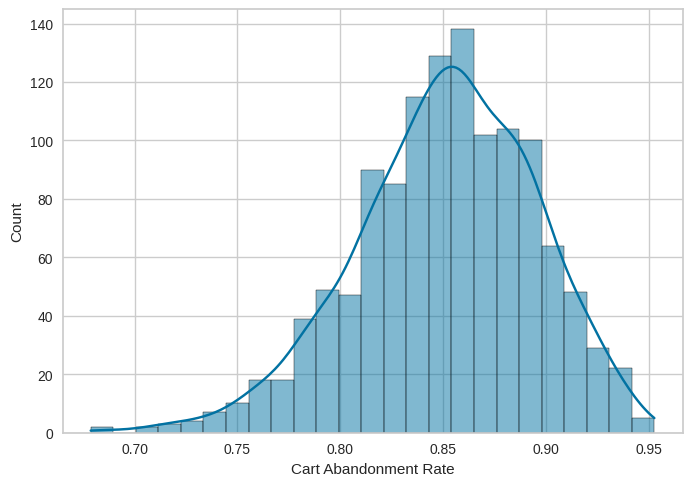

In [ ]:
sns.histplot(non_impulse['Cart Abandonment Rate'], kde=True)

#### Whether customer checks product reviews before purchasing

In [ ]:
# For impulse buyers
np.random.seed(42)
size = len(impulse.index)
p = 0.3      # probability of getting 1
data = np.random.choice([0, 1], size=size, p=[1-p, p])
impulse['Check Review'] = data

<ipython-input-150-ae6c270a8328>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# For indecisive buyers
np.random.seed(42)
size = len(non_impulse.index)
p = 0.8      # probability of getting 1
data = np.random.choice([0, 1], size=size, p=[1-p, p])
non_impulse['Check Review'] = data

In [ ]:
# For remaining buyers
np.random.seed(42)
size = len(remaining_customers.index)
p = 0.6      # probability of getting 1
data = np.random.choice([0, 1], size=size, p=[1-p, p])
remaining_customers['Check Review'] = data

<ipython-input-152-841b8285eb03>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Check Review', ylabel='Count'>

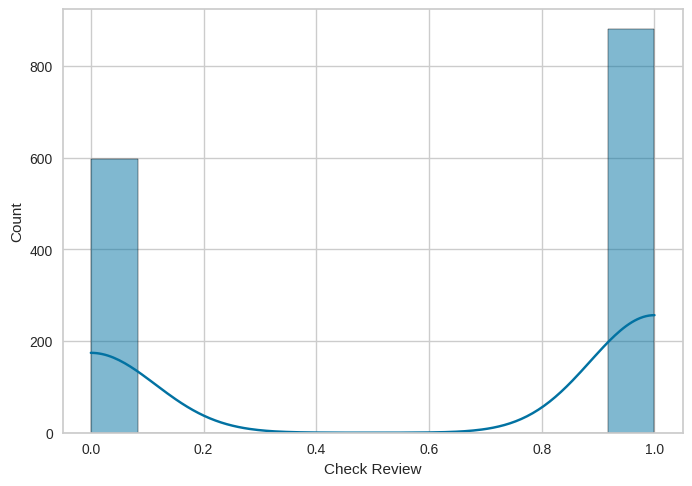

In [ ]:
sns.histplot(remaining_customers['Check Review'], kde=True)

#### Return/refund rate

In [ ]:
# For impulse buyers
np.random.seed(42)
desired_mean = 0.2
size = len(impulse.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
impulse['Refund rate'] = data

impulse.head()

<ipython-input-154-1d7997a64600>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate
2,R_03aEbghUILs9NxD,0,0,0.000000,0.152505,0.000000,0.084507,0.000000,0.049471,0.357143,0.733693,0,0.243994
3,R_06RZP9pS7kONINr,1,1,0.022101,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.709685,1,0.170417
6,R_085qq7w0pkhowox,1,1,0.142079,0.025374,0.000000,0.000000,0.010455,0.036060,1.000000,0.719513,1,0.306721
8,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.061927,0.000000,0.000000,0.000000,1.000000,0.645122,0,0.118960
13,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.118639,0.046602,0.000000,0.035160,1.000000,0.832793,0,0.343723


In [ ]:
# For remaining buyers
np.random.seed(42)
desired_mean = 0.05

size = len(non_impulse.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
non_impulse['Refund rate'] = data

size = len(remaining_customers.index)
beta_param = 10
alpha_param = desired_mean * beta_param / (1 - desired_mean)
data = beta.rvs(alpha_param, beta_param, size=size)
remaining_customers['Refund rate'] = data

<ipython-input-155-46b332def645>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Refund rate', ylabel='Count'>

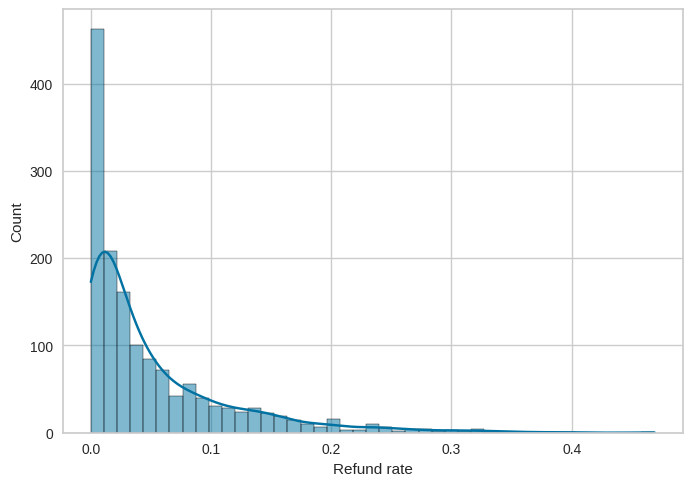

In [ ]:
sns.histplot(remaining_customers['Refund rate'], kde=True)

#### Time in Cart

In [ ]:
# For impulse buyers
np.random.seed(42)
size = len(impulse.index)
data = np.random.exponential(scale=15, size=size) #average time = 15
impulse['Time in Cart'] = data

<ipython-input-157-04b163a7f1e1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# For indecisive buyers
np.random.seed(42)
size = len(non_impulse.index)
data = np.random.exponential(scale=35, size=size) #average time = 35
non_impulse['Time in Cart'] = data

In [ ]:
# For remaining buyers
np.random.seed(42)
size = len(remaining_customers.index)
data = np.random.exponential(scale=25, size=size) #average time = 25
remaining_customers['Time in Cart'] = data

<ipython-input-159-ed14c78009ae>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Time in Cart', ylabel='Count'>

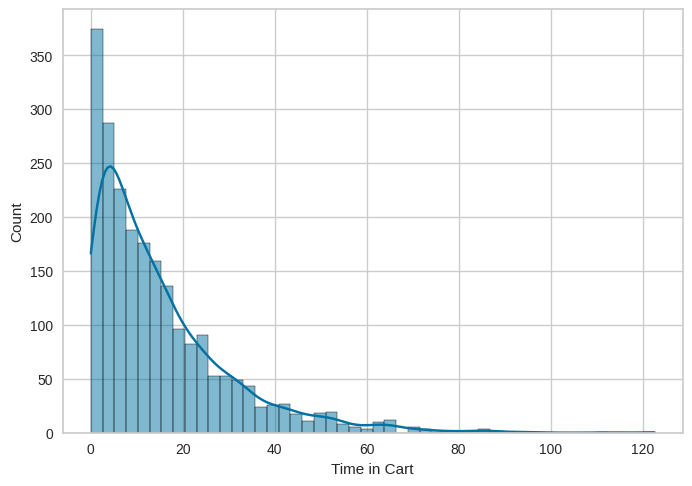

In [ ]:
sns.histplot(impulse['Time in Cart'], kde=True)

#### Time on Page

In [ ]:
# For impulse buyers
np.random.seed(42)
size = len(impulse.index)
data = np.random.exponential(scale=1, size=size) #average time = 1
impulse['Time on Page'] = data

<ipython-input-161-01faf6344a85>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# For indecisive buyers
np.random.seed(42)
size = len(non_impulse.index)
data = np.random.exponential(scale=10, size=size) #average time = 10
non_impulse['Time on Page'] = data

In [ ]:
# For remaining buyers
np.random.seed(42)
size = len(remaining_customers.index)
data = np.random.exponential(scale=5, size=size) #average time = 5
remaining_customers['Time on Page'] = data

<ipython-input-163-30eab97ed18a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: xlabel='Time on Page', ylabel='Count'>

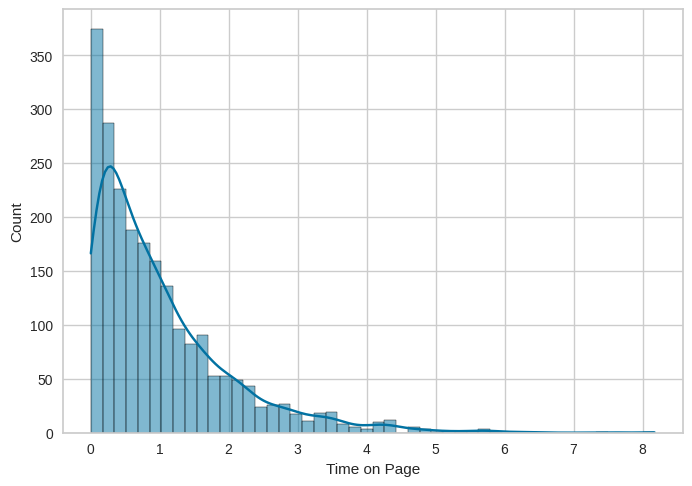

In [ ]:
sns.histplot(impulse['Time on Page'], kde=True)

### Combining columns together

In [ ]:
impulse.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page
2,R_03aEbghUILs9NxD,0,0,0.000000,0.152505,0.000000,0.084507,0.000000,0.049471,0.357143,0.733693,0,0.243994,7.039021,0.469268
3,R_06RZP9pS7kONINr,1,1,0.022101,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.709685,1,0.170417,45.151821,3.010121
6,R_085qq7w0pkhowox,1,1,0.142079,0.025374,0.000000,0.000000,0.010455,0.036060,1.000000,0.719513,1,0.306721,19.751185,1.316746
8,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.061927,0.000000,0.000000,0.000000,1.000000,0.645122,0,0.118960,13.694138,0.912943
13,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.118639,0.046602,0.000000,0.035160,1.000000,0.832793,0,0.343723,2.544373,0.169625


In [ ]:
non_impulse.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page
3277,R_3h3K9E1W2YcQhhk,0,1,0.134382,0.000000,0.000000,0.078802,0.010129,0.045131,0.473684,0.866790,1,0.012920,16.424383,4.692681
3943,R_BzVyOXYGcejjaLv,0,1,0.093417,0.000000,0.000000,0.000000,0.000000,0.021356,0.386364,0.859061,1,0.001922,105.354250,30.101214
1935,R_2ZIHUKwXYNXR0DI,1,1,0.199750,0.000000,0.000000,0.000000,0.000000,0.040120,1.000000,0.849253,1,0.046386,46.086099,13.167457
2163,R_2foDWbM9hrc4GlL,0,0,0.000000,0.000000,0.023012,0.000000,0.000000,0.000000,0.478261,0.821973,1,0.003468,31.952989,9.129426
2538,R_30v4IsTwlZaxIiR,0,0,0.219154,0.042771,0.010794,0.045325,0.000000,0.063923,0.392000,0.922968,0,0.028782,5.936870,1.696249


In [ ]:
remaining_customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page
0,R_01vNIayewjIIKMF,0,0,0.047332,0.000000,0.0,0.000000,0.000000,0.000000,0.6,0.794183,0,0.020594,11.731702,2.346340
5,R_07oHvj3bLVVRCRb,1,1,0.146568,0.020884,0.0,0.000000,0.000000,0.033810,1.0,0.726215,1,0.008515,75.253036,15.050607
7,R_08tF4u5YMrmEJ4l,1,1,0.000000,0.000000,0.0,0.060665,0.000000,0.000000,1.0,0.681246,1,0.199507,32.918642,6.583728
10,R_0Arj0ePpTnReV1v,1,1,0.086011,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.688861,1,0.156163,22.823564,4.564713
11,R_0BCm9hRP9iTI081,1,1,0.110213,0.000000,0.0,0.000000,0.065596,0.036061,1.0,0.723076,0,0.000668,4.240622,0.848124


In [ ]:
customers = pd.concat([impulse, non_impulse, remaining_customers], axis=0, ignore_index=True)
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page
0,R_03aEbghUILs9NxD,0,0,0.000000,0.152505,0.000000,0.084507,0.000000,0.049471,0.357143,0.733693,0,0.243994,7.039021,0.469268
1,R_06RZP9pS7kONINr,1,1,0.022101,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.709685,1,0.170417,45.151821,3.010121
2,R_085qq7w0pkhowox,1,1,0.142079,0.025374,0.000000,0.000000,0.010455,0.036060,1.000000,0.719513,1,0.306721,19.751185,1.316746
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.061927,0.000000,0.000000,0.000000,1.000000,0.645122,0,0.118960,13.694138,0.912943
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.118639,0.046602,0.000000,0.035160,1.000000,0.832793,0,0.343723,2.544373,0.169625


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Free Trial             4923 non-null   int64  
 3   Email CTC              4923 non-null   float64
 4   Display Ad CTC         4923 non-null   float64
 5   Video Ad CTC           4923 non-null   float64
 6   Search Engine Ad CTC   4923 non-null   float64
 7   Social Media Ad CTC    4923 non-null   float64
 8   Average CTC            4923 non-null   float64
 9   Express Shipping       4892 non-null   float64
 10  Cart Abandonment Rate  4923 non-null   float64
 11  Check Review           4923 non-null   int64  
 12  Refund rate            4923 non-null   float64
 13  Time in Cart           4923 non-null   float64
 14  Time on Page           4923 non-null   float64
dtypes: f

In [ ]:
p = purchases.copy()

In [ ]:
p.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,0,0.00,0
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,0,0.10,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,0,0.15,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,0,0.10,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,0,0.00,1


###RFM Scores

<ipython-input-172-d686fc1c799e>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-172-d686fc1c799e>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-172-d686fc1c799e>:40: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-172-

RFM
333    212
332    697
331    166
323    380
322    839
321    283
313    105
312    197
311     99
233     16
232     48
231     15
223     99
222    225
221     76
213    176
212    262
211    170
133     10
132     30
131      6
123     66
122    134
121     53
113    138
112    211
111    210
Name: count, dtype: int64


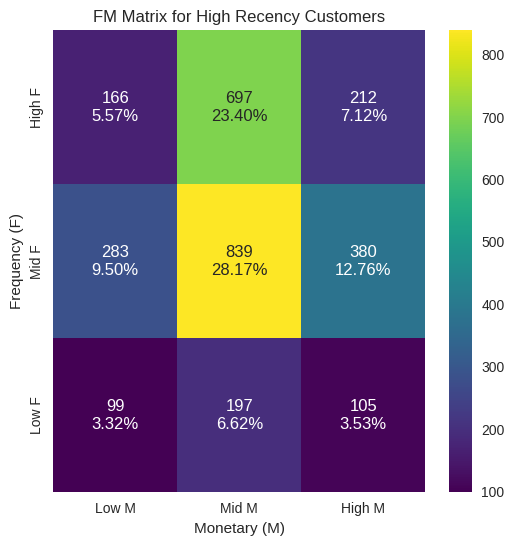

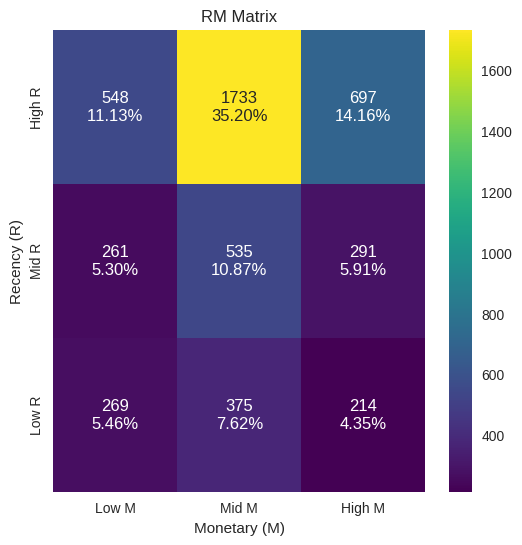

      Survey ResponseID  Prime  Free Trial  Email CTC  Display Ad CTC  \
0     R_03aEbghUILs9NxD      0           0   0.000000        0.152505   
1     R_06RZP9pS7kONINr      1           1   0.022101        0.000000   
2     R_085qq7w0pkhowox      1           1   0.142079        0.025374   
3     R_08uYA7fb4unHGkF      1           1   0.000000        0.000000   
4     R_0BrMxYYMHVMOBEJ      1           1   0.000000        0.000000   
...                 ...    ...         ...        ...             ...   
4918  R_z3emF7IfAc3UqYx      0           1   0.000000        0.017548   
4919  R_z6D1T2MULlDlLAB      1           1   0.000000        0.000000   
4920  R_z89cVoCKmGUboYN      0           1   0.000000        0.000000   
4921  R_z8w9TsEywvOcfCN      0           1   0.071791        0.000000   
4922  R_zfqnsBzlOAKibzb      0           1   0.038314        0.041927   

      Video Ad CTC  Search Engine Ad CTC  Social Media Ad CTC  Average CTC  \
0         0.000000              0.084507     

In [ ]:
#Lifetime RFM
purchases = pd.read_csv('data/purchases.csv')
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
purchases['Recency'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d') - purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
purchases['Frequency'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['Order value'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']
purchases['Monetary'] = purchases.groupby(['Survey ResponseID'])['Order value'].transform('sum')
purchases['Monetary'] = purchases['Monetary']/purchases['Frequency']
purchases['Frequency'] = 46*30/purchases['Frequency']
purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases = purchases.drop_duplicates()
#print(purchases['Frequency'].describe())
#print(purchases['Monetary'].describe())
purchases['Recency'] = purchases['Recency'].dt.days
#Converting lifetime rfm to low,medium,high RFM

conditions_recency = [
    purchases['Recency'] <= 30,
    (purchases['Recency'] > 30) & (purchases['Recency'] <= 365),
    purchases['Recency'] > 365
]

conditions_frequency = [
    purchases['Frequency'] <= 7,
    (purchases['Frequency'] > 7) & (purchases['Frequency'] < 30),
    purchases['Frequency'] >= 30
]

conditions_monetary = [
    purchases['Monetary'] <= 35,
    (purchases['Monetary'] > 35) & (purchases['Monetary'] < 65),
    purchases['Monetary'] >= 65
]
choices_RF = [3,2,1]
choices_M = [1,2,3]
purchases['Recency_category'] = np.select(conditions_recency, choices_RF, default= 'Unknown')
purchases['Frequency_category'] = np.select(conditions_frequency, choices_RF, default= 'Unknown')
purchases['Monetary_category'] = np.select(conditions_monetary, choices_M, default= 'Unknown')
purchases['RFM'] = purchases['Recency_category'].astype(str) + purchases['Frequency_category'].astype(str) + purchases['Monetary_category'].astype(str)
print(purchases['RFM'].value_counts().sort_index(ascending= False))
lifetime_rfm = purchases[['Survey ResponseID','RFM']].drop_duplicates()
#FM matrix for each recency

#recency_3_data = purchases[purchases['Recency'] == 3]
fm_counts = [
    [sum(purchases['RFM'] == "331"), sum(purchases['RFM'] == "332"), sum(purchases['RFM'] == "333")],
    [sum(purchases['RFM'] == "321"), sum(purchases['RFM'] == "322"), sum(purchases['RFM'] == "323")],
    [sum(purchases['RFM'] == "311"), sum(purchases['RFM'] == "312"), sum(purchases['RFM'] == "313")]
]
fm_matrix = np.array(fm_counts)
total_count = fm_matrix.sum()
percentages = (fm_matrix / total_count * 100).round(2)
annot_labels = np.array([f"{count}\n{percent:.2f}%"
                         for count_row, percent_row in zip(fm_matrix, percentages)
                         for count, percent in zip(count_row, percent_row)]).reshape(fm_matrix.shape)

plt.figure(figsize=(6, 6))
sns.heatmap(fm_matrix, annot=annot_labels, fmt="", cmap="viridis",
            xticklabels=['Low M', 'Mid M', 'High M'],
            yticklabels=['High F', 'Mid F', 'Low F'])
plt.title("FM Matrix for High Recency Customers")
plt.xlabel("Monetary (M)")
plt.ylabel("Frequency (F)")
plt.show()

#RM matrix
fm_counts = [
    [sum((purchases['Recency_category'] == "3") & (purchases['Monetary_category'] == "1")),
     sum((purchases['Recency_category'] == "3") & (purchases['Monetary_category'] == "2")),
     sum((purchases['Recency_category'] == "3") & (purchases['Monetary_category'] == "3"))],
    [sum((purchases['Recency_category'] == "2") & (purchases['Monetary_category'] == "1")),
     sum((purchases['Recency_category'] == "2") & (purchases['Monetary_category'] == "2")),
     sum((purchases['Recency_category'] == "2") & (purchases['Monetary_category'] == "3"))],
    [sum((purchases['Recency_category'] == "1") & (purchases['Monetary_category'] == "1")),
     sum((purchases['Recency_category'] == "1") & (purchases['Monetary_category'] == "2")),
     sum((purchases['Recency_category'] == "1") & (purchases['Monetary_category'] == "3"))]
]
fm_matrix = np.array(fm_counts)
total_count = fm_matrix.sum()
percentages = (fm_matrix / total_count * 100).round(2)
annot_labels = np.array([f"{count}\n{percent:.2f}%"
                         for count_row, percent_row in zip(fm_matrix, percentages)
                         for count, percent in zip(count_row, percent_row)]).reshape(fm_matrix.shape)

plt.figure(figsize=(6, 6))
sns.heatmap(fm_matrix, annot=annot_labels, fmt="", cmap="viridis",
            xticklabels=['Low M', 'Mid M', 'High M'],
            yticklabels=['High R', 'Mid R', 'Low R'])
plt.title("RM Matrix")
plt.xlabel("Monetary (M)")
plt.ylabel("Recency (R)")
plt.show()
fig = px.scatter_3d(purchases, x='Recency', y='Frequency', z='Monetary',
                    color='Monetary', size = 'Frequency',
                    labels={'Recency':'Recency', 'Frequency':'Frequency', 'Monetary':'Monetary'},
                    title="RFM 3D Scatter Plot")
fig.show()
#customers = customers.drop(columns=['RFM'])
customers = pd.merge(customers, lifetime_rfm, on='Survey ResponseID', how='inner')
print(customers)

##

## EDA

###Loading libraries and data

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px
import time
import random
from scipy.stats import beta

In [ ]:
customers = pd.read_csv('data/customers.csv')
purchases = pd.read_csv('data/purchases.csv')

In [ ]:
p = purchases.copy()
p.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1


In [ ]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530763 entries, 0 to 1530762
Data columns (total 11 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Order Date                1530763 non-null  object 
 1   Purchase Price Per Unit   1530763 non-null  float64
 2   Quantity                  1530763 non-null  int64  
 3   Shipping Address State    1455701 non-null  object 
 4   Title                     1449174 non-null  object 
 5   ASIN/ISBN (Product Code)  1530137 non-null  object 
 6   Survey ResponseID         1530763 non-null  object 
 7   Category                  1449737 non-null  object 
 8   Prime                     1530763 non-null  int64  
 9   Discounts                 1530763 non-null  float64
 10  Express Shipping          1530763 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 128.5+ MB


In [ ]:
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page,RFM
0,R_03aEbghUILs9NxD,0,0,0.000000,0.152505,0.000000,0.084507,0.000000,0.049471,0.357143,0.733693,0,0.243994,7.039021,0.469268,111
1,R_06RZP9pS7kONINr,1,1,0.022101,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.709685,1,0.170417,45.151821,3.010121,323
2,R_085qq7w0pkhowox,1,1,0.142079,0.025374,0.000000,0.000000,0.010455,0.036060,1.000000,0.719513,1,0.306721,19.751185,1.316746,322
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.061927,0.000000,0.000000,0.000000,1.000000,0.645122,0,0.118960,13.694138,0.912943,223
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.118639,0.046602,0.000000,0.035160,1.000000,0.832793,0,0.343723,2.544373,0.169625,212


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Free Trial             4923 non-null   int64  
 3   Email CTC              4923 non-null   float64
 4   Display Ad CTC         4923 non-null   float64
 5   Video Ad CTC           4923 non-null   float64
 6   Search Engine Ad CTC   4923 non-null   float64
 7   Social Media Ad CTC    4923 non-null   float64
 8   Average CTC            4923 non-null   float64
 9   Express Shipping       4892 non-null   float64
 10  Cart Abandonment Rate  4923 non-null   float64
 11  Check Review           4923 non-null   int64  
 12  Refund rate            4923 non-null   float64
 13  Time in Cart           4923 non-null   float64
 14  Time on Page           4923 non-null   float64
 15  RFM 

###EDA

#### Sales graph

In [ ]:
#monthly sales graph
purchases['Order value'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
daily_sales = purchases.groupby(['Year','Month'])['Order value'].sum().reset_index()
daily_sales['Order Date'] = pd.to_datetime(daily_sales[['Year', 'Month']].assign(DAY=1))

fig = px.line(daily_sales, x='Order Date', y='Order value', title='Daily Sales',
              labels = {'Order Date':'Date',
                        'Order value': 'Monthly Revenue ($)'}) # Corrected x to 'Order Date'
fig.update_layout(title_text="Monthly Revenue from Jan 2018 to Oct 2022")
fig

In [ ]:
#Yearly revenue growth comparison
yearly_revenue = purchases.groupby('Year')['Order value'].sum().reset_index()
yearly_revenue['Growth'] = yearly_revenue['Order value'].pct_change() * 100
print(yearly_revenue)

purchase_filtered = purchases[purchases['Month'] <= 10]
yearly_revenue_filtered = purchase_filtered.groupby('Year')['Order value'].sum().reset_index()
yearly_revenue_filtered['Growth'] = yearly_revenue_filtered['Order value'].pct_change() * 100
yearly_revenue_filtered = yearly_revenue_filtered[yearly_revenue_filtered['Year'] >= 2019]
#Bar graph of yearly revenue filtered
fig = px.bar(yearly_revenue_filtered, x='Year', y='Growth', title='Yearly Revenue',
             labels = {'Order Date':'Year',
                       'Growth': 'Change in revenue wrt previous year (%)'},
             text = 'Growth') # Corrected x to 'Order Date'
fig.update_traces(marker_color=np.where(yearly_revenue_filtered['Growth'] < 0, 'red', 'green'))
fig.update_layout(title_text="Revenue growth of 1st 10 months of each year")
fig.update_xaxes(
    dtick="Y1",  # Set tick interval to 1 year
    tickformat="%Y"  # Format tick labels to show only the year
)
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig

   Year  Order value     Growth
0  2018   5362999.56        NaN
1  2019   6002681.08  11.927682
2  2020   8335881.97  38.869313
3  2021   9423502.81  13.047460
4  2022   7197340.10 -23.623516


#### Whether customers are Prime members

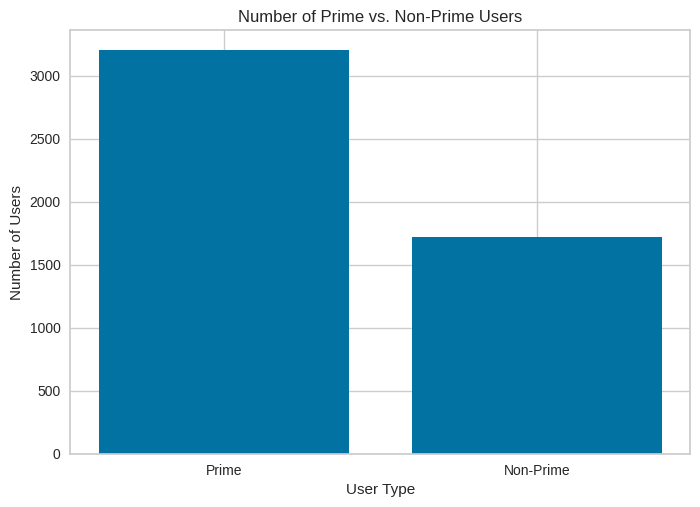

In [ ]:
prime_users = p[p['Prime'] == 1]
prime_users = prime_users['Survey ResponseID'].drop_duplicates()

non_prime_users = p[p['Prime'] == 0]
non_prime_users = non_prime_users['Survey ResponseID'].drop_duplicates()

num_prime_users = len(prime_users)
num_non_prime_users = len(non_prime_users)
user_types = ['Prime', 'Non-Prime']
user_counts = [num_prime_users, num_non_prime_users]

plt.bar(user_types, user_counts)
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Number of Prime vs. Non-Prime Users')
plt.show()

In [ ]:
len(prime_users) / len(customers)

0.6500101564086939

65% of customers are Amazon Prime users, whereas 35% are not.

#### Cart Abandonment rate

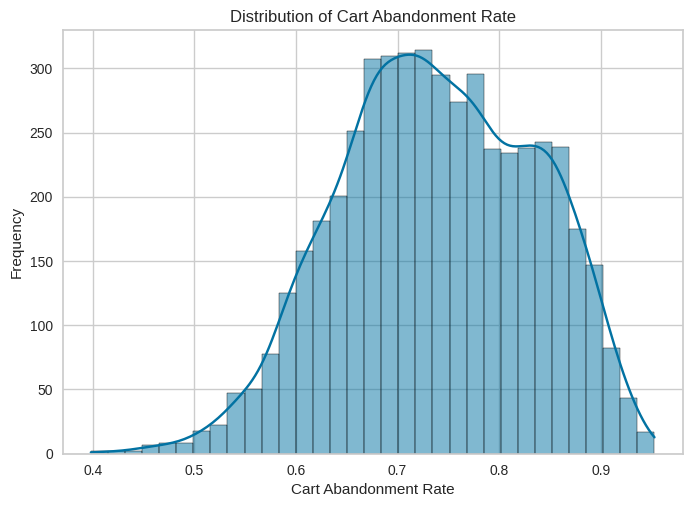

In [ ]:
sns.histplot(customers['Cart Abandonment Rate'], kde=True)
plt.xlabel('Cart Abandonment Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Cart Abandonment Rate')
plt.show()

In [ ]:
customers['Cart Abandonment Rate'].median()

0.7372327897628862

Overall cart abandonment rate seems to be quite high, with almost everyone choosing to abandon their carts more than half of the time. ~74% of carts are abandoned.

#### Whether customers check Product Reviews

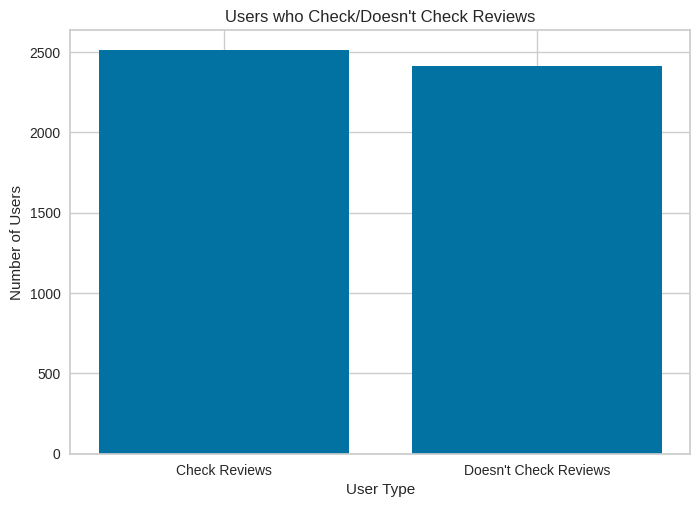

In [ ]:
check_users = customers[customers['Check Review'] == 1]
check_users = check_users['Survey ResponseID'].drop_duplicates()

no_check_users = customers[customers['Check Review'] == 0]
no_check_users = no_check_users['Survey ResponseID'].drop_duplicates()

num_check_users = len(check_users)
num_no_check_users = len(no_check_users)
user_types_reviews = ['Check Reviews', 'Doesn\'t Check Reviews']
user_counts_reviews = [num_check_users, num_no_check_users]

plt.bar(user_types_reviews, user_counts_reviews)
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Users who Check/Doesn\'t Check Reviews')
plt.show()

In [ ]:
num_check_users/len(customers)

0.5098517164330693

51.0% of customers check reviews

#### Trial

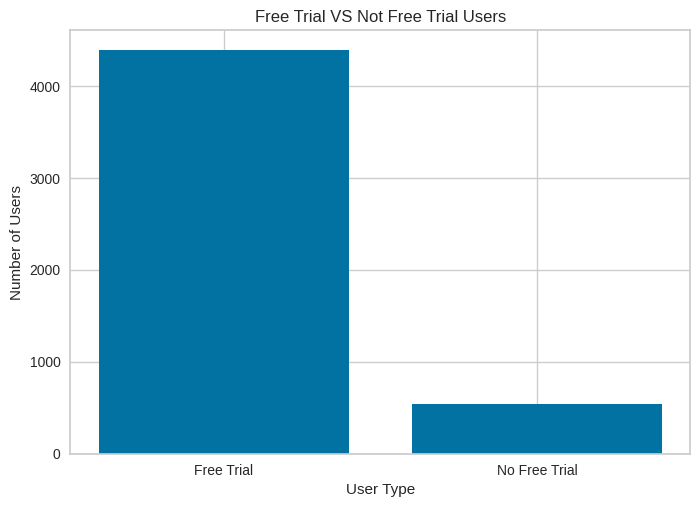

In [ ]:
free_trial = customers[customers['Free Trial'] == 1]
free_trial = free_trial['Survey ResponseID'].drop_duplicates()

no_free_trial = customers[customers['Free Trial'] == 0]
no_free_trial = no_free_trial['Survey ResponseID'].drop_duplicates()

num_free_trial = len(free_trial)
num_no_free_trial = len(no_free_trial)
user_types_trial = ['Free Trial', 'No Free Trial']
user_counts_trial = [num_free_trial, num_no_free_trial]

plt.bar(user_types_trial, user_counts_trial)
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Free Trial VS Not Free Trial Users')
plt.show()

In [ ]:
num_free_trial/len(customers)

0.8911232988015437

89.5% of customers are on free trial

#### Percentage of Discounted Items Bought

In [ ]:
p['discount_applied'] = p['Discounts'].apply(lambda x: 1 if x > 0 else 0)

discount_counts = p.groupby('Survey ResponseID')['discount_applied'].value_counts().unstack(fill_value=0)
discount_counts.columns = ['no_discount', 'with_discount']
discount_counts['total_items'] = discount_counts['with_discount'] + discount_counts['no_discount']
discount_counts['pct_discount'] = discount_counts['with_discount'] / discount_counts['total_items']
discount_counts.head(20)

,no_discount,with_discount,total_items,pct_discount
Survey ResponseID,,,,
R_01vNIayewjIIKMF,4,3,7,0.428571
R_037XK72IZBJyF69,331,237,568,0.417254
R_03aEbghUILs9NxD,14,18,32,0.562500
R_06RZP9pS7kONINr,220,186,406,0.458128
R_06d9ULxrBmkwSTn,62,44,106,0.415094
R_07oHvj3bLVVRCRb,15,12,27,0.444444
R_085qq7w0pkhowox,157,131,288,0.454861
R_08tF4u5YMrmEJ4l,4,3,7,0.428571
R_08uYA7fb4unHGkF,55,34,89,0.382022


In [ ]:
keep = discount_counts[discount_counts['total_items'] > 5]

discount_counts['keep discounts'] = discount_counts.index.isin(keep.index).astype(int)
discount_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4923 entries, R_01vNIayewjIIKMF to R_zfqnsBzlOAKibzb
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no_discount     4923 non-null   int64  
 1   with_discount   4923 non-null   int64  
 2   total_items     4923 non-null   int64  
 3   pct_discount    4923 non-null   float64
 4   keep discounts  4923 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 359.8+ KB


In [ ]:
customers['Pct Discount'] = pd.merge(customers, discount_counts, on='Survey ResponseID', how='left')['pct_discount']
customers['Keep Discount'] = pd.merge(customers, discount_counts, on='Survey ResponseID', how='left')['keep discounts']
p = p.drop(columns=['discount_applied'])
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,Cart Abandonment Rate,Check Review,Refund rate,Time in Cart,Time on Page,RFM,Pct Discount,Keep Discount
0,R_03aEbghUILs9NxD,0,0,0.000000,0.152505,0.000000,0.084507,0.000000,0.049471,0.357143,0.733693,0,0.243994,7.039021,0.469268,111,0.562500,1
1,R_06RZP9pS7kONINr,1,1,0.022101,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.709685,1,0.170417,45.151821,3.010121,323,0.458128,1
2,R_085qq7w0pkhowox,1,1,0.142079,0.025374,0.000000,0.000000,0.010455,0.036060,1.000000,0.719513,1,0.306721,19.751185,1.316746,322,0.454861,1
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.061927,0.000000,0.000000,0.000000,1.000000,0.645122,0,0.118960,13.694138,0.912943,223,0.382022,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.118639,0.046602,0.000000,0.035160,1.000000,0.832793,0,0.343723,2.544373,0.169625,212,0.380952,1


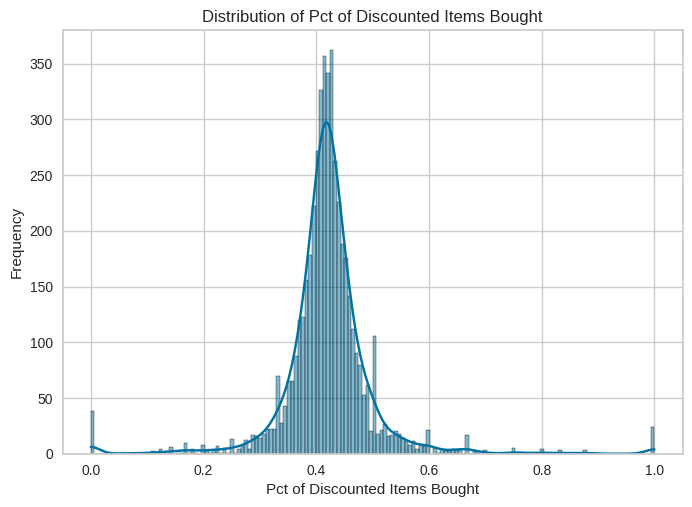

In [ ]:
sns.histplot(customers['Pct Discount'], kde=True)
plt.xlabel('Pct of Discounted Items Bought')
plt.ylabel('Frequency')
plt.title('Distribution of Pct of Discounted Items Bought')
plt.show()

#### Refund / Return Rate

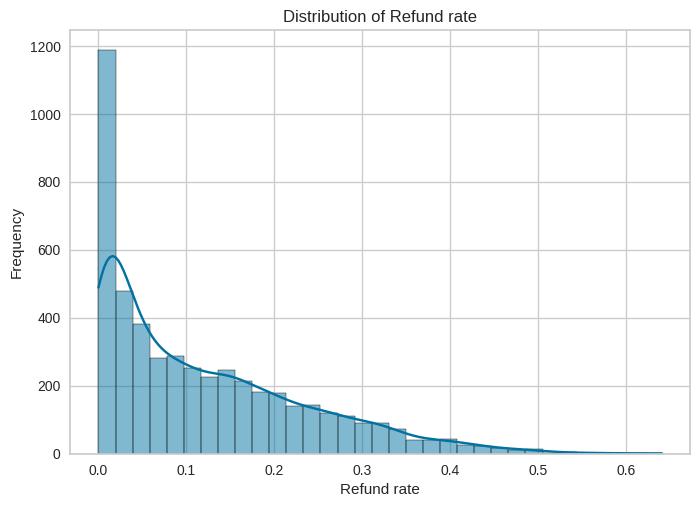

In [ ]:
sns.histplot(customers['Refund rate'], kde=True)
plt.xlabel('Refund rate')
plt.ylabel('Frequency')
plt.title('Distribution of Refund rate')
plt.show()

#### Category

<Axes: xlabel='pct of category', ylabel='Count'>

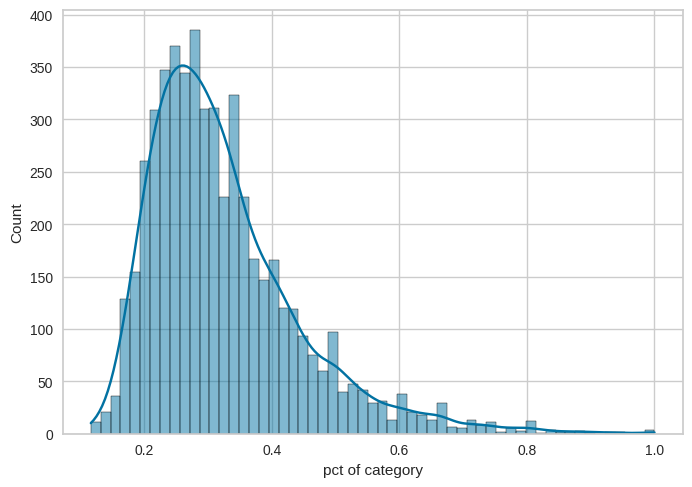

In [ ]:
#Most popular category for each customer
purchases['Total items bought'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['Total items bought per category'] = purchases.groupby(['Survey ResponseID','Category'])['Order Date'].transform('nunique')
purchases['Most items category'] = purchases.groupby(['Survey ResponseID'])['Total items bought per category'].transform('max')
purchases = purchases[purchases['Total items bought per category'] == purchases['Most items category']]
purchases_filtered = purchases[['Total items bought','Survey ResponseID','Category','Most items category']].drop_duplicates()
purchases_filtered['pct of category'] = purchases_filtered['Most items category']/purchases_filtered['Total items bought']

purchases_filtered = purchases_filtered[purchases_filtered['Total items bought'] >= 5]

sns.histplot(purchases_filtered['pct of category'], kde=True)

In [ ]:
purchases_filtered = purchases_filtered[purchases_filtered['pct of category'] > 0.5]
purchases_filtered = purchases_filtered.drop(columns=['Total items bought','pct of category', 'Most items category'])
customers = pd.merge(customers, purchases_filtered, on='Survey ResponseID', how='left')
customers.head()
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4926 entries, 0 to 4925
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4926 non-null   object 
 1   Prime                  4926 non-null   int64  
 2   Free Trial             4926 non-null   int64  
 3   Email CTC              4926 non-null   float64
 4   Display Ad CTC         4926 non-null   float64
 5   Video Ad CTC           4926 non-null   float64
 6   Search Engine Ad CTC   4926 non-null   float64
 7   Social Media Ad CTC    4926 non-null   float64
 8   Average CTC            4926 non-null   float64
 9   Express Shipping       4894 non-null   float64
 10  Cart Abandonment Rate  4926 non-null   float64
 11  Check Review           4926 non-null   int64  
 12  Refund rate            4926 non-null   float64
 13  Time in Cart           4926 non-null   float64
 14  Time on Page           4926 non-null   float64
 15  RFM 

In [ ]:
# We have 4934 IDs instead of 4933: One dude has a duplicated entry bc he has 2 categories tied for most purchased category
duplicates = customers[customers['Survey ResponseID'].duplicated(keep=False)]
print(duplicates)

      Survey ResponseID  Prime  Free Trial  Email CTC  Display Ad CTC  \
4260  R_3GdnyGwbVF0dSiX      0           1   0.000000        0.012883   
4261  R_3GdnyGwbVF0dSiX      0           1   0.000000        0.012883   
4439  R_3k85Clfjw382OSO      1           1   0.193606        0.000000   
4440  R_3k85Clfjw382OSO      1           1   0.193606        0.000000   
4902  R_xc3pVSyq4it2sr7      1           1   0.156453        0.000000   
4903  R_xc3pVSyq4it2sr7      1           1   0.156453        0.000000   

      Video Ad CTC  Search Engine Ad CTC  Social Media Ad CTC  Average CTC  \
4260           0.0              0.043715                  0.0     0.000000   
4261           0.0              0.043715                  0.0     0.000000   
4439           0.0              0.000000                  0.0     0.042084   
4440           0.0              0.000000                  0.0     0.042084   
4902           0.0              0.032178                  0.0     0.037749   
4903           0.0  

In [ ]:
customers = customers.drop(customers[customers.duplicated(subset='Survey ResponseID', keep='first')].sample(frac=1).index)
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4923 entries, 0 to 4925
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Free Trial             4923 non-null   int64  
 3   Email CTC              4923 non-null   float64
 4   Display Ad CTC         4923 non-null   float64
 5   Video Ad CTC           4923 non-null   float64
 6   Search Engine Ad CTC   4923 non-null   float64
 7   Social Media Ad CTC    4923 non-null   float64
 8   Average CTC            4923 non-null   float64
 9   Express Shipping       4892 non-null   float64
 10  Cart Abandonment Rate  4923 non-null   float64
 11  Check Review           4923 non-null   int64  
 12  Refund rate            4923 non-null   float64
 13  Time in Cart           4923 non-null   float64
 14  Time on Page           4923 non-null   float64
 15  RFM      

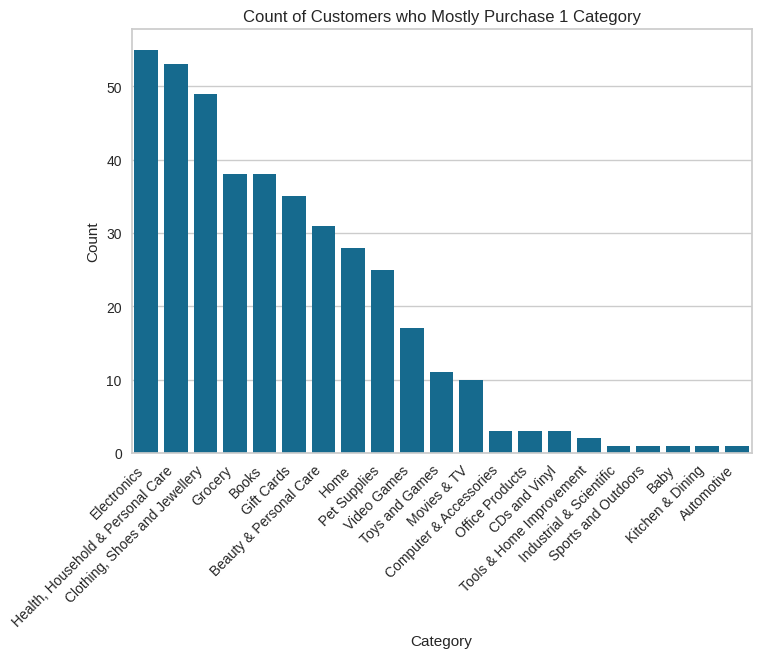

In [ ]:
counts = customers['Category'].value_counts().dropna()

sns.barplot(x = counts.index, y=counts.values)
plt.title('Count of Customers who Mostly Purchase 1 Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Paid for express shipping:

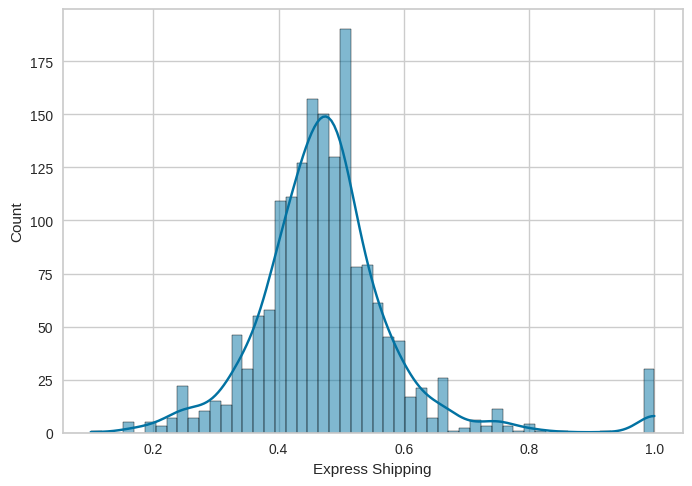

In [ ]:
#Plot of % of orders bought with express shipping for non-prime customers
sns.histplot(customers[customers['Prime'] == 0]['Express Shipping'], kde = True)
plt.show()

#### Click-to-conversion (CTC) Rates

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Email CTC'),
  Text(1, 0, 'Display Ad CTC'),
  Text(2, 0, 'Video Ad CTC'),
  Text(3, 0, 'Search Engine Ad CTC'),
  Text(4, 0, 'Social Media Ad CTC')])

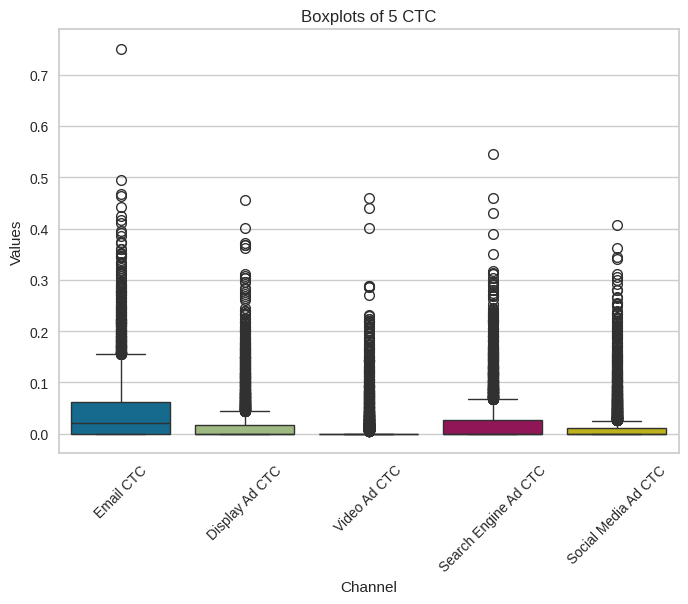

In [ ]:
sns.boxplot(data=customers[['Email CTC','Display Ad CTC','Video Ad CTC','Search Engine Ad CTC','Social Media Ad CTC']])

plt.title('Boxplots of 5 CTC')
plt.xlabel('Channel')
plt.ylabel('Values')
plt.xticks(rotation=45)

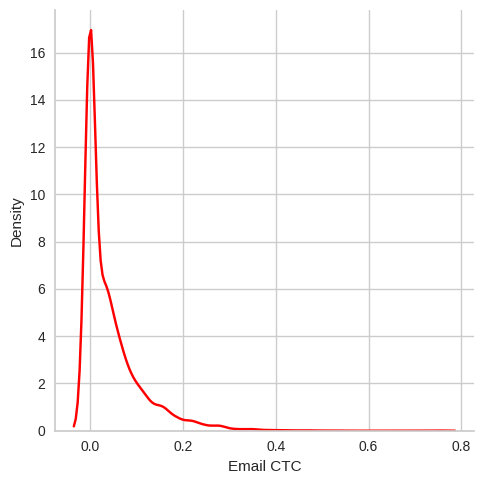

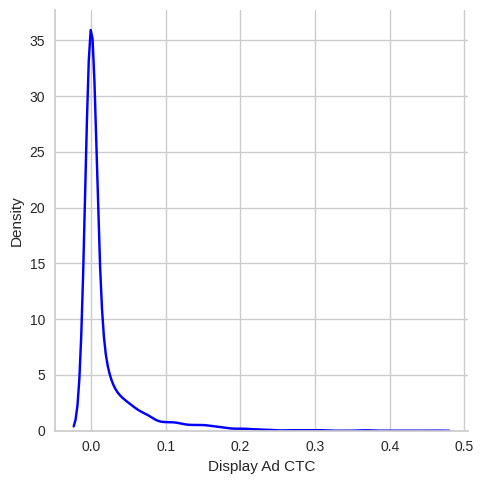

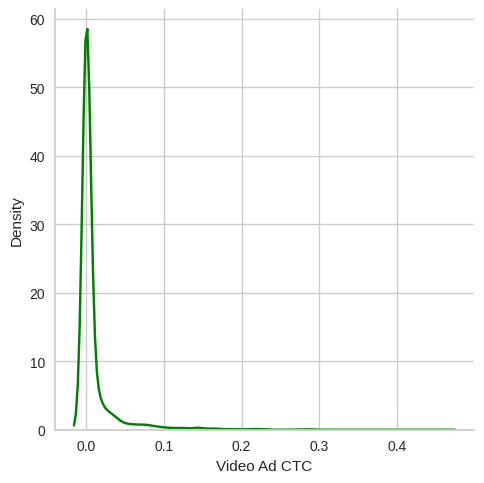

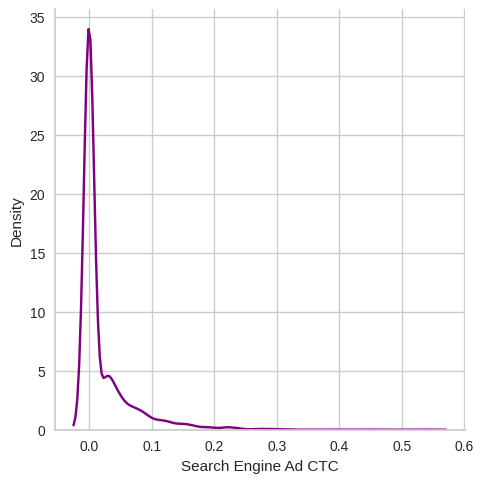

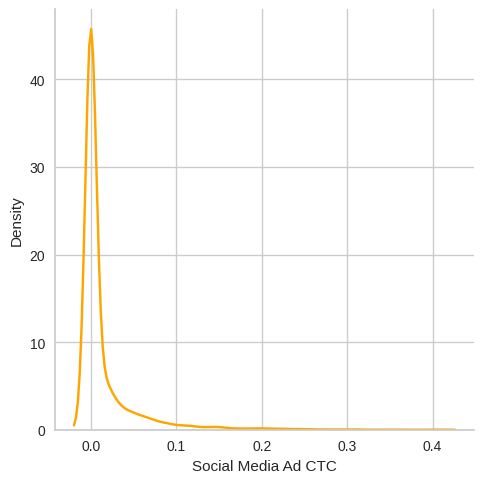

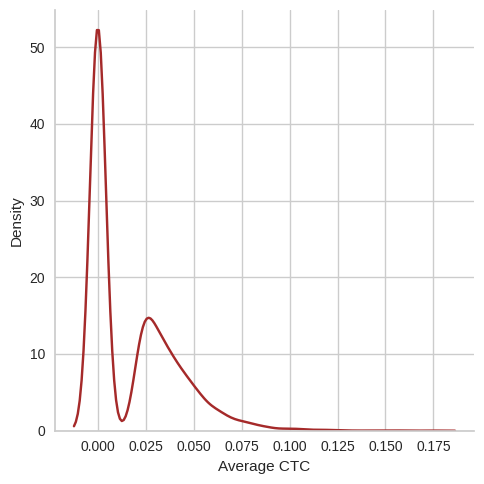

In [ ]:
#distribution of CTC for different marketing channels
sns.displot(customers['Email CTC'], kind = 'kde', color = "red")
sns.displot(customers['Display Ad CTC'], kind = 'kde', color = "blue")
sns.displot(customers['Video Ad CTC'], kind = 'kde', color = "green")
sns.displot(customers['Search Engine Ad CTC'], kind = 'kde', color = "purple")
sns.displot(customers['Social Media Ad CTC'], kind = 'kde', color = "orange")
sns.displot(customers['Average CTC'], kind = 'kde', color = "brown")
plt.show()

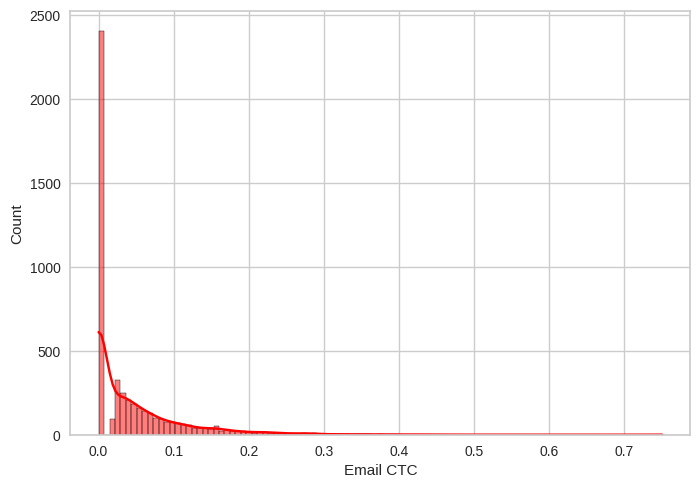

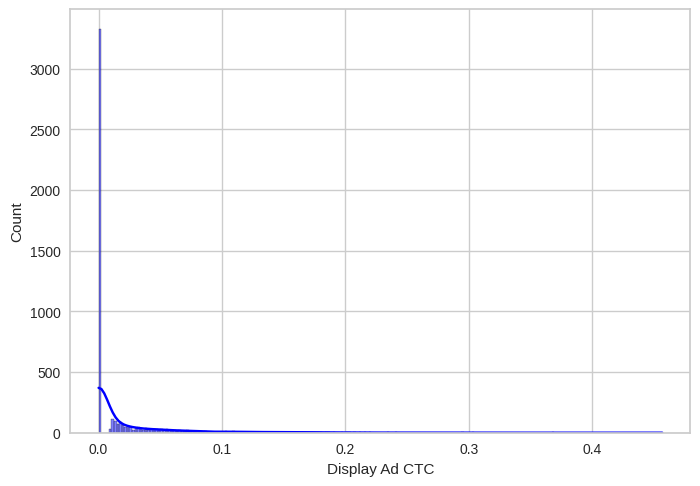

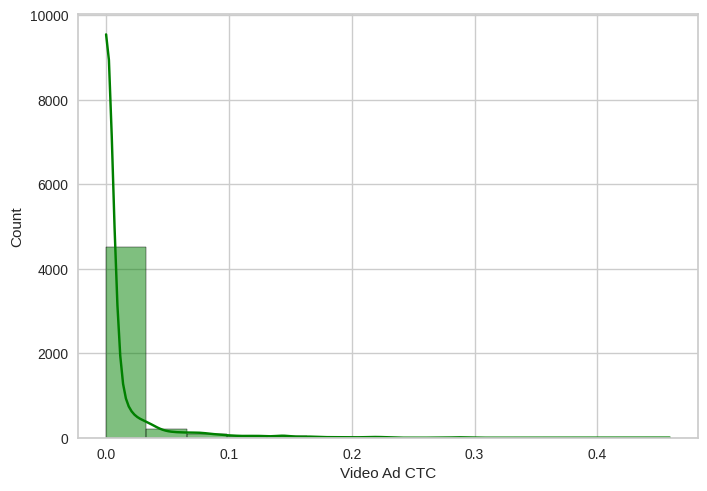

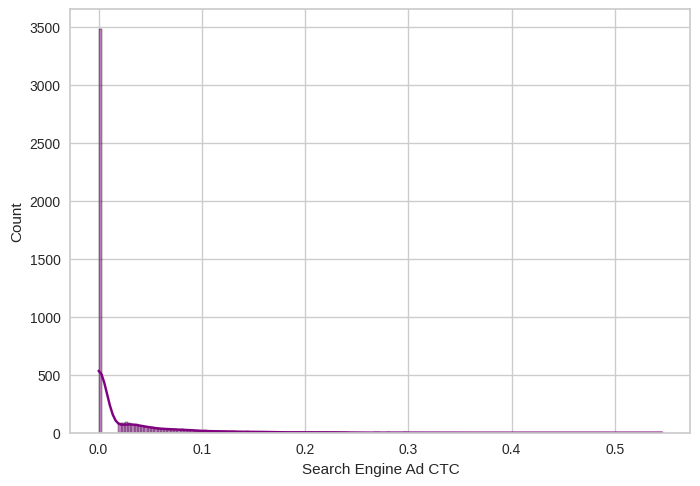

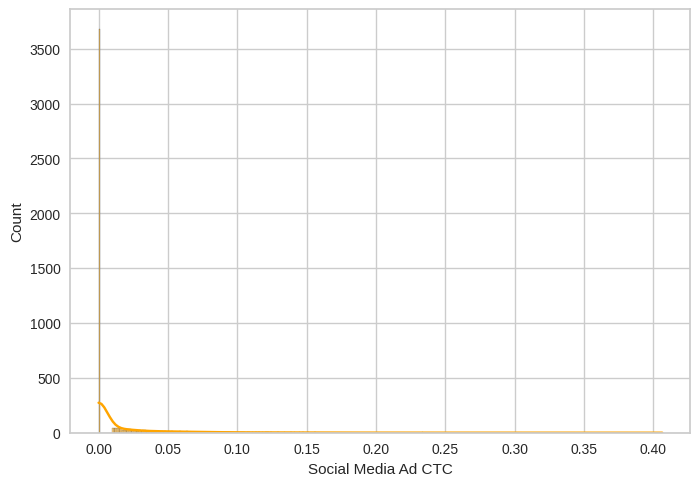

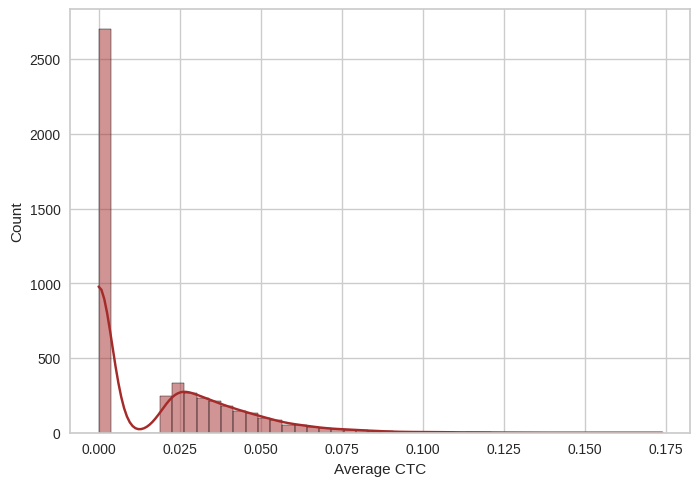

In [ ]:
sns.histplot(customers['Email CTC'], kde = True, color = "red")
plt.show()
sns.histplot(customers['Display Ad CTC'], kde = True, color = "blue")
plt.show()
sns.histplot(customers['Video Ad CTC'], kde = True, color = "green")
plt.show()
sns.histplot(customers['Search Engine Ad CTC'], kde = True, color = "purple")
plt.show()
sns.histplot(customers['Social Media Ad CTC'], kde = True, color = "orange")
plt.show()
sns.histplot(customers['Average CTC'], kde = True, color = "brown")
plt.show()

#### Time in Cart

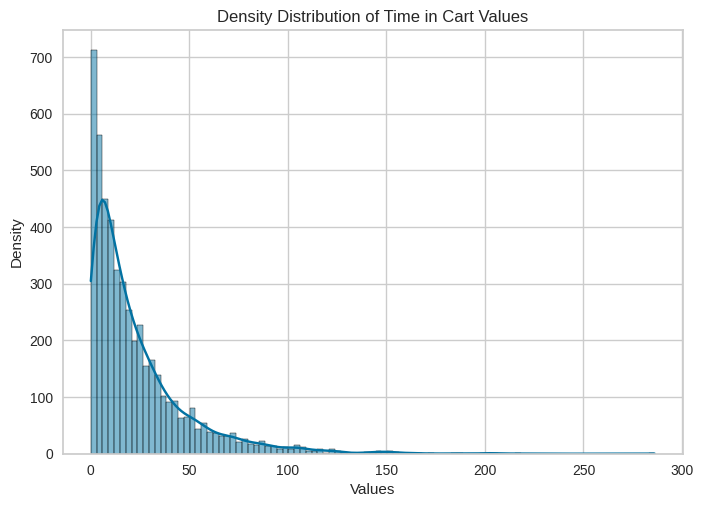

In [ ]:
#sns.kdeplot(customers['Time in Cart'], fill=True)
sns.histplot(customers['Time in Cart'], kde=True)
plt.title('Density Distribution of Time in Cart Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

#### Time on Page

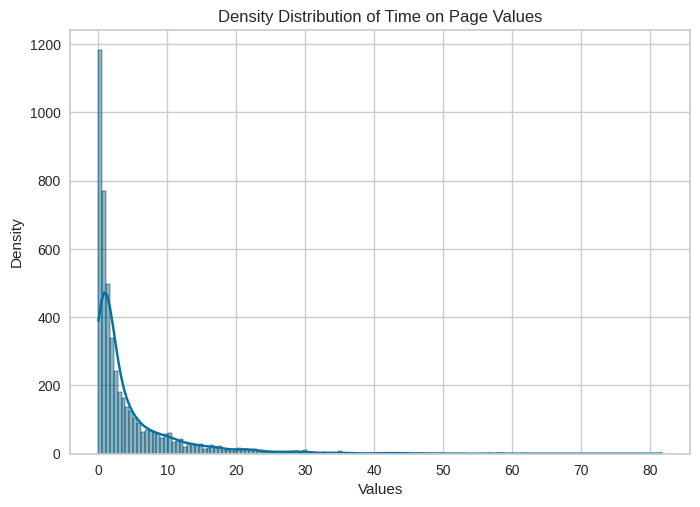

In [ ]:
#sns.kdeplot(customers['Time on Page'], fill=True)
sns.histplot(customers['Time on Page'], kde=True)
plt.title('Density Distribution of Time on Page Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

####FM Matrix

FM
33     942
32     274
31      19
23     252
22     650
21     312
13      36
12     304
11    2128
Name: count, dtype: int64


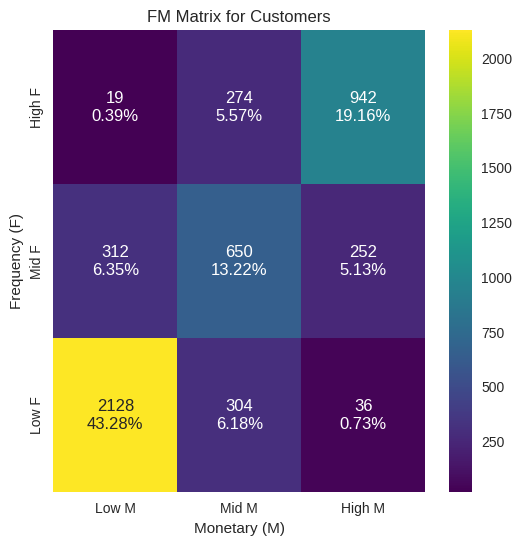

In [ ]:
#Lifetime RFM
purchases['Order Date'] = pd.to_datetime(purchases['Order Date'], format='%Y-%m-%d')
purchases = purchases[purchases['Order Date'] < pd.to_datetime('2022-11-01', format='%Y-%m-%d')]
purchases['Year'] = purchases['Order Date'].dt.year
purchases['Month'] = purchases['Order Date'].dt.month
purchases['Recency'] = pd.to_datetime('2022-11-01', format='%Y-%m-%d') - purchases.groupby(['Survey ResponseID'])['Order Date'].transform("max")
#Frequency need to change to number of purchases/month
purchases['Frequency'] = purchases.groupby(['Survey ResponseID'])['Order Date'].transform('nunique')
purchases['Order value'] = purchases['Quantity'] * purchases['Purchase Price Per Unit']
purchases['Monetary'] = purchases.groupby(['Survey ResponseID'])['Order value'].transform('sum')
purchases = purchases[['Recency','Frequency','Monetary','Survey ResponseID']]
purchases = purchases.drop_duplicates()
purchases['Recency'] = purchases['Recency'].dt.days
freq_medium = purchases['Frequency'].quantile(0.5)
freq_high = purchases['Frequency'].quantile(0.75)
monetary_medium = purchases['Monetary'].quantile(0.5)
monetary_high = purchases['Monetary'].quantile(0.75)
#print(purchases['Frequency'].describe())
#print(purchases['Monetary'].describe())
conditions_frequency = [
    purchases['Frequency'] <= freq_medium,
    (purchases['Frequency'] > freq_medium) & (purchases['Frequency'] < freq_high),
    purchases['Frequency'] >= freq_high
]

conditions_monetary = [
    purchases['Monetary'] <= monetary_medium,
    (purchases['Monetary'] > monetary_medium) & (purchases['Monetary'] < monetary_high),
    purchases['Monetary'] >= monetary_high
]
choices_FM = [1,2,3]
purchases['Frequency_category'] = np.select(conditions_frequency, choices_FM, default= 'Unknown')
purchases['Monetary_category'] = np.select(conditions_monetary, choices_FM, default= 'Unknown')
purchases['FM'] = purchases['Frequency_category'].astype(str) + purchases['Monetary_category'].astype(str)
print(purchases['FM'].value_counts().sort_index(ascending= False))
lifetime_fm = purchases[['Survey ResponseID','FM']].drop_duplicates()
fm_counts = [
    [sum(purchases['FM'] == "31"), sum(purchases['FM'] == "32"), sum(purchases['FM'] == "33")],
    [sum(purchases['FM'] == "21"), sum(purchases['FM'] == "22"), sum(purchases['FM'] == "23")],
    [sum(purchases['FM'] == "11"), sum(purchases['FM'] == "12"), sum(purchases['FM'] == "13")]
]
fm_matrix = np.array(fm_counts)
total_count = fm_matrix.sum()
percentages = (fm_matrix / total_count * 100).round(2)
annot_labels = np.array([f"{count}\n{percent:.2f}%"
                         for count_row, percent_row in zip(fm_matrix, percentages)
                         for count, percent in zip(count_row, percent_row)]).reshape(fm_matrix.shape)

plt.figure(figsize=(6, 6))
sns.heatmap(fm_matrix, annot=annot_labels, fmt="", cmap="viridis",
            xticklabels=['Low M', 'Mid M', 'High M'],
            yticklabels=['High F', 'Mid F', 'Low F'])
plt.title("FM Matrix for Customers")
plt.xlabel("Monetary (M)")
plt.ylabel("Frequency (F)")
plt.show()

# 1.2: Develop customer segmentation models based on purchasing behavior

## Importing libraries and data

In [ ]:
import csv
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import plotly.express as px
import time
import random
from scipy.stats import beta

In [ ]:
customers = pd.read_csv('data/segmentation_customers.csv')
purchases = pd.read_csv('data/purchases.csv')

In [ ]:
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Refund rate,Time in Cart,Time on Page,RFM,Recency_category,Frequency_category,Monetary_category,Pct Discount,Keep Discount,Category
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,0.243994,7.039021,0.469268,111,1,1,1,0.562500,1,NaN
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,0.170417,45.151821,3.010121,323,3,2,3,0.458128,1,NaN
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,0.306721,19.751185,1.316746,322,3,2,2,0.454861,1,NaN
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,0.118960,13.694138,0.912943,223,2,2,3,0.382022,1,NaN
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,0.343723,2.544373,0.169625,212,2,1,2,0.380952,1,NaN


In [ ]:
purchases.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Survey ResponseID,Category,Prime,Discounts,Express Shipping
0,2018-12-04,7.98,1,NJ,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,B0143RTB1E,R_01vNIayewjIIKMF,Electronics,1,0.00,1
1,2018-12-22,13.99,1,NJ,Betron BS10 Earphones Wired Headphones in Ear ...,B01MA1MJ6H,R_01vNIayewjIIKMF,Electronics,1,0.00,1
2,2018-12-24,8.99,1,NJ,NaN,B078JZTFN3,R_01vNIayewjIIKMF,NaN,1,0.00,1
3,2018-12-25,10.45,1,NJ,Perfecto Stainless Steel Shaving Bowl. Durable...,B06XWF9HML,R_01vNIayewjIIKMF,Kitchen & Dining,1,0.05,1
4,2018-12-25,10.00,1,NJ,Proraso Shaving Cream for Men,B00837ZOI0,R_01vNIayewjIIKMF,Beauty & Personal Care,1,0.05,1


## Customer Segmentation

### Saving time/urgency (for non-Prime members)

In [ ]:
urgency = customers[customers['Express Shipping'] >= 0.5]
urgency = urgency[urgency['Time in Cart'] <= 20]
urgency = urgency[urgency['Prime'] == 0]
len(urgency)

358

In [ ]:
len(urgency) / len(customers[customers['Prime'] == 0])


0.2077771329077191

about 23% of non-prime users are more urgent (will pay for expedited shipping more often).

In [ ]:
urgency['Cat_Urgency'] = 1
urgency['Cat_Urgency'] = urgency['Cat_Urgency'].astype(int)
urgency = urgency[['Survey ResponseID', 'Cat_Urgency']]
customers = pd.merge(customers, urgency, on='Survey ResponseID', how='left')
customers['Cat_Urgency'] = customers['Cat_Urgency'].fillna(0).astype(int)
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Time in Cart,Time on Page,RFM,Recency_category,Frequency_category,Monetary_category,Pct Discount,Keep Discount,Category,Cat_Urgency
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,7.039021,0.469268,111,1,1,1,0.562500,1,NaN,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,45.151821,3.010121,323,3,2,3,0.458128,1,NaN,0
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,19.751185,1.316746,322,3,2,2,0.454861,1,NaN,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,13.694138,0.912943,223,2,2,3,0.382022,1,NaN,0
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,2.544373,0.169625,212,2,1,2,0.380952,1,NaN,0


### Impulse buyer

In [ ]:
impulse = customers[customers['Time in Cart'] <= 20]
impulse = impulse[impulse['Time on Page'] <= 2.5]
impulse = impulse[impulse['Check Review'] == 0 ]
impulse = impulse[impulse['Refund rate'] > 0.05]
len(impulse)

1779

In [ ]:
len(impulse) / len(customers)

0.36136502132845827

about 36% of customers are impulse buyers.

In [ ]:
impulse['Cat_Impulse'] = 1
impulse['Cat_Impulse'] = impulse['Cat_Impulse'].astype(int)
impulse = impulse[['Survey ResponseID', 'Cat_Impulse']]
customers = pd.merge(customers, impulse, on='Survey ResponseID', how='left')
customers['Cat_Impulse'] = customers['Cat_Impulse'].fillna(0).astype(int)
customers.head()

<ipython-input-66-3cac4d642c10>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-66-3cac4d642c10>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Time on Page,RFM,Recency_category,Frequency_category,Monetary_category,Pct Discount,Keep Discount,Category,Cat_Urgency,Cat_Impulse
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,0.469268,111,1,1,1,0.562500,1,NaN,0,1
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,3.010121,323,3,2,3,0.458128,1,NaN,0,0
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,1.316746,322,3,2,2,0.454861,1,NaN,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,0.912943,223,2,2,3,0.382022,1,NaN,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,0.169625,212,2,1,2,0.380952,1,NaN,0,1


### Indecisive/cautious

In [ ]:
indecisive = customers[customers['Cart Abandonment Rate'] >= 0.75]
indecisive = indecisive[indecisive['Check Review'] == 1]
indecisive = indecisive[indecisive['Time on Page'] >= 7]
indecisive = indecisive[indecisive['Time in Cart'] >= 30]
len(indecisive)

623

In [ ]:
len(indecisive) / len(customers)

0.12654885232581758

about 13% of customers are indecisive buyers

In [ ]:
indecisive['Cat_Indecisive'] = 1
indecisive['Cat_Indecisive'] = indecisive['Cat_Indecisive'].astype(int)
indecisive = indecisive[['Survey ResponseID', 'Cat_Indecisive']]
customers = pd.merge(customers, indecisive, on='Survey ResponseID', how='left')
customers['Cat_Indecisive'] = customers['Cat_Indecisive'].fillna(0).astype(int)
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,RFM,Recency_category,Frequency_category,Monetary_category,Pct Discount,Keep Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,111,1,1,1,0.562500,1,NaN,0,1,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,323,3,2,3,0.458128,1,NaN,0,0,0
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,322,3,2,2,0.454861,1,NaN,0,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,223,2,2,3,0.382022,1,NaN,0,1,0
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,212,2,1,2,0.380952,1,NaN,0,1,0


### Category

In [ ]:
cat = customers[customers['Category'].notnull()]
len(cat)

406

In [ ]:
len(indecisive) / len(customers)

0.12654885232581758

about 13% of customers have a frequently purchased category that they stick to when ordering

In [ ]:
cat['Cat_Category'] = 1
cat['Cat_Category'] = cat['Cat_Category'].astype(int)
cat = cat[['Survey ResponseID', 'Cat_Category']]
customers = pd.merge(customers, cat, on='Survey ResponseID', how='left')
customers['Cat_Category'] = customers['Cat_Category'].fillna(0).astype(int)
customers.head()

<ipython-input-72-42e965a28865>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-72-42e965a28865>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Recency_category,Frequency_category,Monetary_category,Pct Discount,Keep Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,1,1,1,0.562500,1,NaN,0,1,0,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,3,2,3,0.458128,1,NaN,0,0,0,0
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,3,2,2,0.454861,1,NaN,0,0,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,2,2,3,0.382022,1,NaN,0,1,0,0
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,2,1,2,0.380952,1,NaN,0,1,0,0


### Price sensitive

In [ ]:
discount = customers[customers['Keep Discount'] == 1]
discount = customers[customers['Pct Discount'] >= 0.4]
len(discount)

3460

In [ ]:
len(discount) / len(customers)

0.7028234816169002

In [ ]:
discount['Cat_Discount'] = 1
discount['Cat_Discount'] = discount['Cat_Discount'].astype(int)
discount = discount[['Survey ResponseID', 'Cat_Discount']]
customers = pd.merge(customers, discount, on='Survey ResponseID', how='left')
customers['Cat_Discount'] = customers['Cat_Discount'].fillna(0).astype(int)
customers.head()

<ipython-input-75-9f3e8be7b132>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-75-9f3e8be7b132>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Frequency_category,Monetary_category,Pct Discount,Keep Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,1,1,0.562500,1,NaN,0,1,0,0,1
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,2,3,0.458128,1,NaN,0,0,0,0,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,2,2,0.454861,1,NaN,0,0,0,0,1
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,2,3,0.382022,1,NaN,0,1,0,0,0
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,1,2,0.380952,1,NaN,0,1,0,0,0


In [ ]:
customers = customers.drop(columns = ['Keep Discount'])

### Marketing Engagement

In [ ]:
cols_to_check = ['Email CTC', 'Display Ad CTC', 'Video Ad CTC', 'Search Engine Ad CTC', 'Social Media Ad CTC']
filtered_cust = customers[customers[cols_to_check].gt(0).any(axis=1)]
len(filtered_cust)

4358

In [ ]:
len(filtered_cust) / len(customers)

0.88523258175909

about 87% of customers were engaged by any one of the marketing ads

In [ ]:
filtered_cust['Cat_Engagement'] = 1
filtered_cust['Cat_Engagement'] = filtered_cust['Cat_Engagement'].astype(int)
filtered_cust = filtered_cust[['Survey ResponseID', 'Cat_Engagement']]
customers = pd.merge(customers, filtered_cust, on='Survey ResponseID', how='left')
customers['Cat_Engagement'] = customers['Cat_Engagement'].fillna(0).astype(int)
customers.head()

<ipython-input-79-a159f1190ae9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-79-a159f1190ae9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Frequency_category,Monetary_category,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,1,1,0.562500,NaN,0,1,0,0,1,1
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,2,3,0.458128,NaN,0,0,0,0,1,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,2,2,0.454861,NaN,0,0,0,0,1,1
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,2,3,0.382022,NaN,0,1,0,0,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,1,2,0.380952,NaN,0,1,0,0,0,1


### High Value Customers

In [ ]:
hvc = customers.copy()
hvc[['R', 'F', 'M']] = hvc['RFM'].astype(str).apply(lambda x: pd.Series(list(x)))
hvc[['R', 'F', 'M']] = hvc[['R', 'F', 'M']].astype(int)
hvc.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,R,F,M
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,NaN,0,1,0,0,1,1,1,1,1
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,NaN,0,0,0,0,1,1,3,2,3
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,NaN,0,0,0,0,1,1,3,2,2
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,NaN,0,1,0,0,0,1,2,2,3
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,NaN,0,1,0,0,0,1,2,1,2


In [ ]:
hvc_f = hvc[hvc['F'] == 3]
len(hvc_f) / len(customers)

0.2437538086532602

about 25% of customers are high value (frequent) customers

In [ ]:
hvc_f['Cat_High_Value_F'] = 1
hvc_f['Cat_High_Value_F'] = hvc_f['Cat_High_Value_F'].astype(int)
hvc_f = hvc_f[['Survey ResponseID', 'Cat_High_Value_F']]
customers = pd.merge(customers, hvc_f, on='Survey ResponseID', how='left')
customers['Cat_High_Value_F'] = customers['Cat_High_Value_F'].fillna(0).astype(int)
customers.head()

<ipython-input-82-f8d94d414ed1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-82-f8d94d414ed1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Monetary_category,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,Cat_High_Value_F
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,1,0.562500,NaN,0,1,0,0,1,1,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,3,0.458128,NaN,0,0,0,0,1,1,0
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,2,0.454861,NaN,0,0,0,0,1,1,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,3,0.382022,NaN,0,1,0,0,0,1,0
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,2,0.380952,NaN,0,1,0,0,0,1,0


In [ ]:
hvc_m = hvc[hvc['M'] == 3]
len(hvc_m) / len(customers)

0.24416006500101564

about 25% of customers are high value (high spending) customers

In [ ]:
hvc_m['Cat_High_Value_M'] = 1
hvc_m['Cat_High_Value_M'] = hvc_m['Cat_High_Value_M'].astype(int)
hvc_m = hvc_m[['Survey ResponseID', 'Cat_High_Value_M']]
customers = pd.merge(customers, hvc_m, on='Survey ResponseID', how='left')
customers['Cat_High_Value_M'] = customers['Cat_High_Value_M'].fillna(0).astype(int)
customers.head()

<ipython-input-84-6c6b74739680>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-84-6c6b74739680>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,Cat_High_Value_F,Cat_High_Value_M
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,0.562500,NaN,0,1,0,0,1,1,0,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,0.458128,NaN,0,0,0,0,1,1,0,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,0.454861,NaN,0,0,0,0,1,1,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,0.382022,NaN,0,1,0,0,0,1,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,0.380952,NaN,0,1,0,0,0,1,0,0


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Free Trial             4923 non-null   int64  
 3   Email CTC              4923 non-null   float64
 4   Display Ad CTC         4923 non-null   float64
 5   Video Ad CTC           4923 non-null   float64
 6   Search Engine Ad CTC   4923 non-null   float64
 7   Social Media Ad CTC    4923 non-null   float64
 8   Average CTC            4923 non-null   float64
 9   Express Shipping       4896 non-null   float64
 10  Cart Abandonment Rate  4923 non-null   float64
 11  Check Review           4923 non-null   int64  
 12  Refund rate            4923 non-null   float64
 13  Time in Cart           4923 non-null   float64
 14  Time on Page           4923 non-null   float64
 15  RFM 

### Analysis

In [ ]:
customers.head()

,Survey ResponseID,Prime,Free Trial,Email CTC,Display Ad CTC,Video Ad CTC,Search Engine Ad CTC,Social Media Ad CTC,Average CTC,Express Shipping,...,Pct Discount,Category,Cat_Urgency,Cat_Impulse,Cat_Indecisive,Cat_Category,Cat_Discount,Cat_Engagement,Cat_High_Value_F,Cat_High_Value_M
0,R_03aEbghUILs9NxD,1,1,0.000000,0.037819,0.000000,0.000000,0.000000,0.000000,1.0,...,0.562500,NaN,0,1,0,0,1,1,0,0
1,R_06RZP9pS7kONINr,1,1,0.073157,0.028239,0.000000,0.050699,0.000000,0.030436,1.0,...,0.458128,NaN,0,0,0,0,1,1,0,1
2,R_085qq7w0pkhowox,1,1,0.000000,0.000000,0.000000,0.000000,0.065627,0.000000,1.0,...,0.454861,NaN,0,0,0,0,1,1,0,0
3,R_08uYA7fb4unHGkF,1,1,0.000000,0.000000,0.072766,0.000000,0.000000,0.000000,1.0,...,0.382022,NaN,0,1,0,0,0,1,0,1
4,R_0BrMxYYMHVMOBEJ,1,1,0.000000,0.000000,0.000000,0.036028,0.000000,0.000000,1.0,...,0.380952,NaN,0,1,0,0,0,1,0,0


In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4923 entries, 0 to 4922
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey ResponseID      4923 non-null   object 
 1   Prime                  4923 non-null   int64  
 2   Free Trial             4923 non-null   int64  
 3   Email CTC              4923 non-null   float64
 4   Display Ad CTC         4923 non-null   float64
 5   Video Ad CTC           4923 non-null   float64
 6   Search Engine Ad CTC   4923 non-null   float64
 7   Social Media Ad CTC    4923 non-null   float64
 8   Average CTC            4923 non-null   float64
 9   Express Shipping       4896 non-null   float64
 10  Cart Abandonment Rate  4923 non-null   float64
 11  Check Review           4923 non-null   int64  
 12  Refund rate            4923 non-null   float64
 13  Time in Cart           4923 non-null   float64
 14  Time on Page           4923 non-null   float64
 15  RFM 

In [ ]:
label_count = customers.iloc[:, 21:29].sum(axis=0)
print(label_count)

Cat_Urgency          358
Cat_Impulse         1779
Cat_Indecisive       623
Cat_Category         406
Cat_Discount        3460
Cat_Engagement      4358
Cat_High_Value_F    1200
Cat_High_Value_M    1202
dtype: int64


In [ ]:
label_percentage = (label_count / len(customers)) * 100
print(label_percentage)

Cat_Urgency          7.271989
Cat_Impulse         36.136502
Cat_Indecisive      12.654885
Cat_Category         8.247004
Cat_Discount        70.282348
Cat_Engagement      88.523258
Cat_High_Value_F    24.375381
Cat_High_Value_M    24.416007
dtype: float64


In [ ]:
impulse_engaged = customers[(customers['Cat_Engagement'] == 1) & (customers['Cat_Impulse'] == 1)].shape[0]
impulse_engaged / 1779 * 100

88.92636312535133

In [ ]:
discount_indecisive = customers[(customers['Cat_Indecisive'] == 1) & (customers['Cat_Discount'] == 1)].shape[0]
discount_indecisive / 3460 * 100

11.734104046242773

In [ ]:
total_high_prime = sum(((customers['Cat_High_Value_F'] == 1) | (customers['Cat_High_Value_M'] == 1)) & (customers['Prime'] == 1))
total_high_value = sum((customers['Cat_High_Value_F'] == 1) | (customers['Cat_High_Value_M'] == 1))
(total_high_prime) / (total_high_value) * 100

77.26432532347505